# <a id='#1'>1. Load libraries and read the data</a>
## <a id='1.1'>1.1. Load libraries</a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# For Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import missingno as msno

# For scaling the data
from sklearn.preprocessing import StandardScaler

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA,IncrementalPCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## <a id='1.2'>1.2. Read the data</a>

In [2]:
#Reading the Dataset 
Country_data=pd.read_csv("Country-data.csv")

# <a id='2'>2. Exploratory Data Analysis</a>
## <a id='2.1'>2.1. Shape and Head of data </a> 

In [3]:
#Shape of dataset
print("There are {} countries and {} features: ".format(Country_data.shape[0],Country_data.shape[1]))
#Reading the first 5 rows of the dataset
Country_data.head()

There are 167 countries and 10 features: 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## <a id='2.2'>2.2. Data Conversion </a> 
### Converting exports, health and imports variables into specified percentages of GDPP

In [4]:
Country_data['exports'] = Country_data['exports']*Country_data['gdpp']/100
Country_data['imports'] = Country_data['imports']*Country_data['gdpp']/100
Country_data['health'] = Country_data['health']*Country_data['gdpp']/100
print('After Conversion')
Country_data.head()

After Conversion


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# <a id='2.3'> 2.3. Visualising Missing Values</a> 
#### <a href='#2.3.1'>2.3.1. Martix Plot</a>
#### <a href='#2.3.2'>2.3.2. Bar Plot</a>
#### <a href='#2.3.3'>2.3.3. Check for Null & Nan values</a>


## <a id='2.3.1'> 2.3.1 Martix Plot</a> 

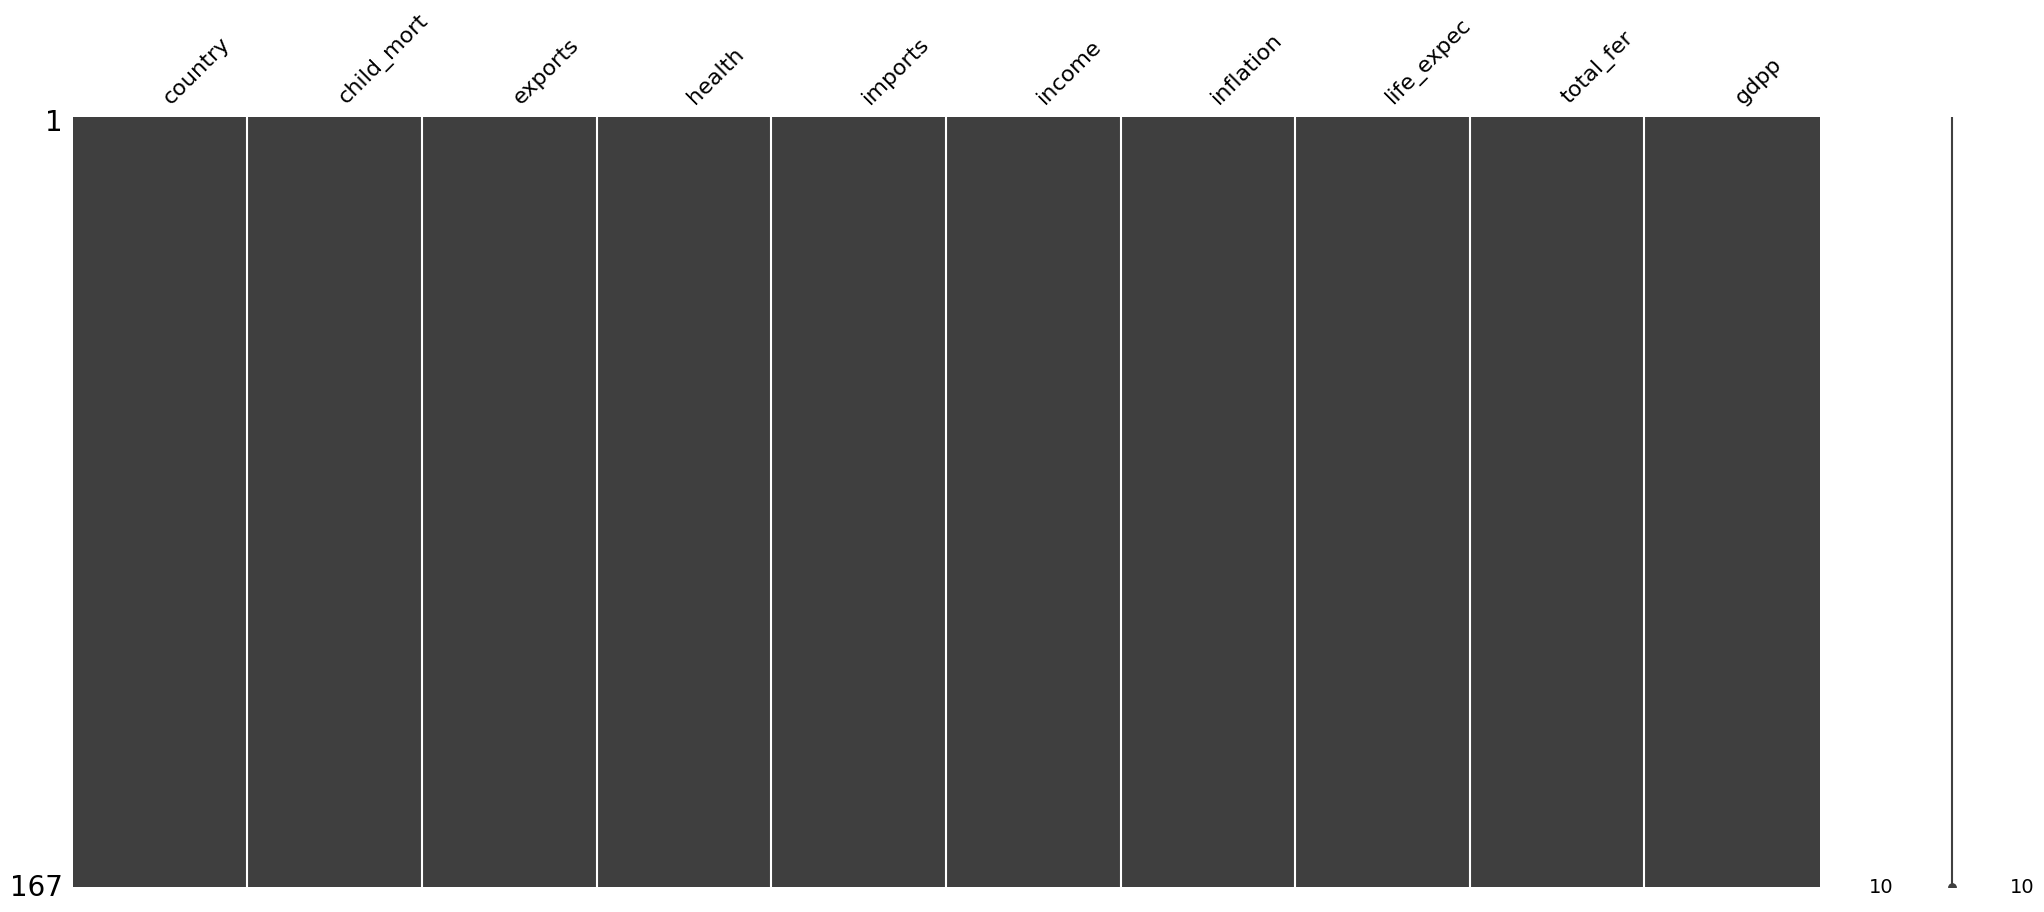

In [5]:
msno.matrix(Country_data)
plt.savefig('missing matrix.png')

The above plot shows no missing values

## <a id='2.3.2'> 2.3.2 Bar Plot</a> 

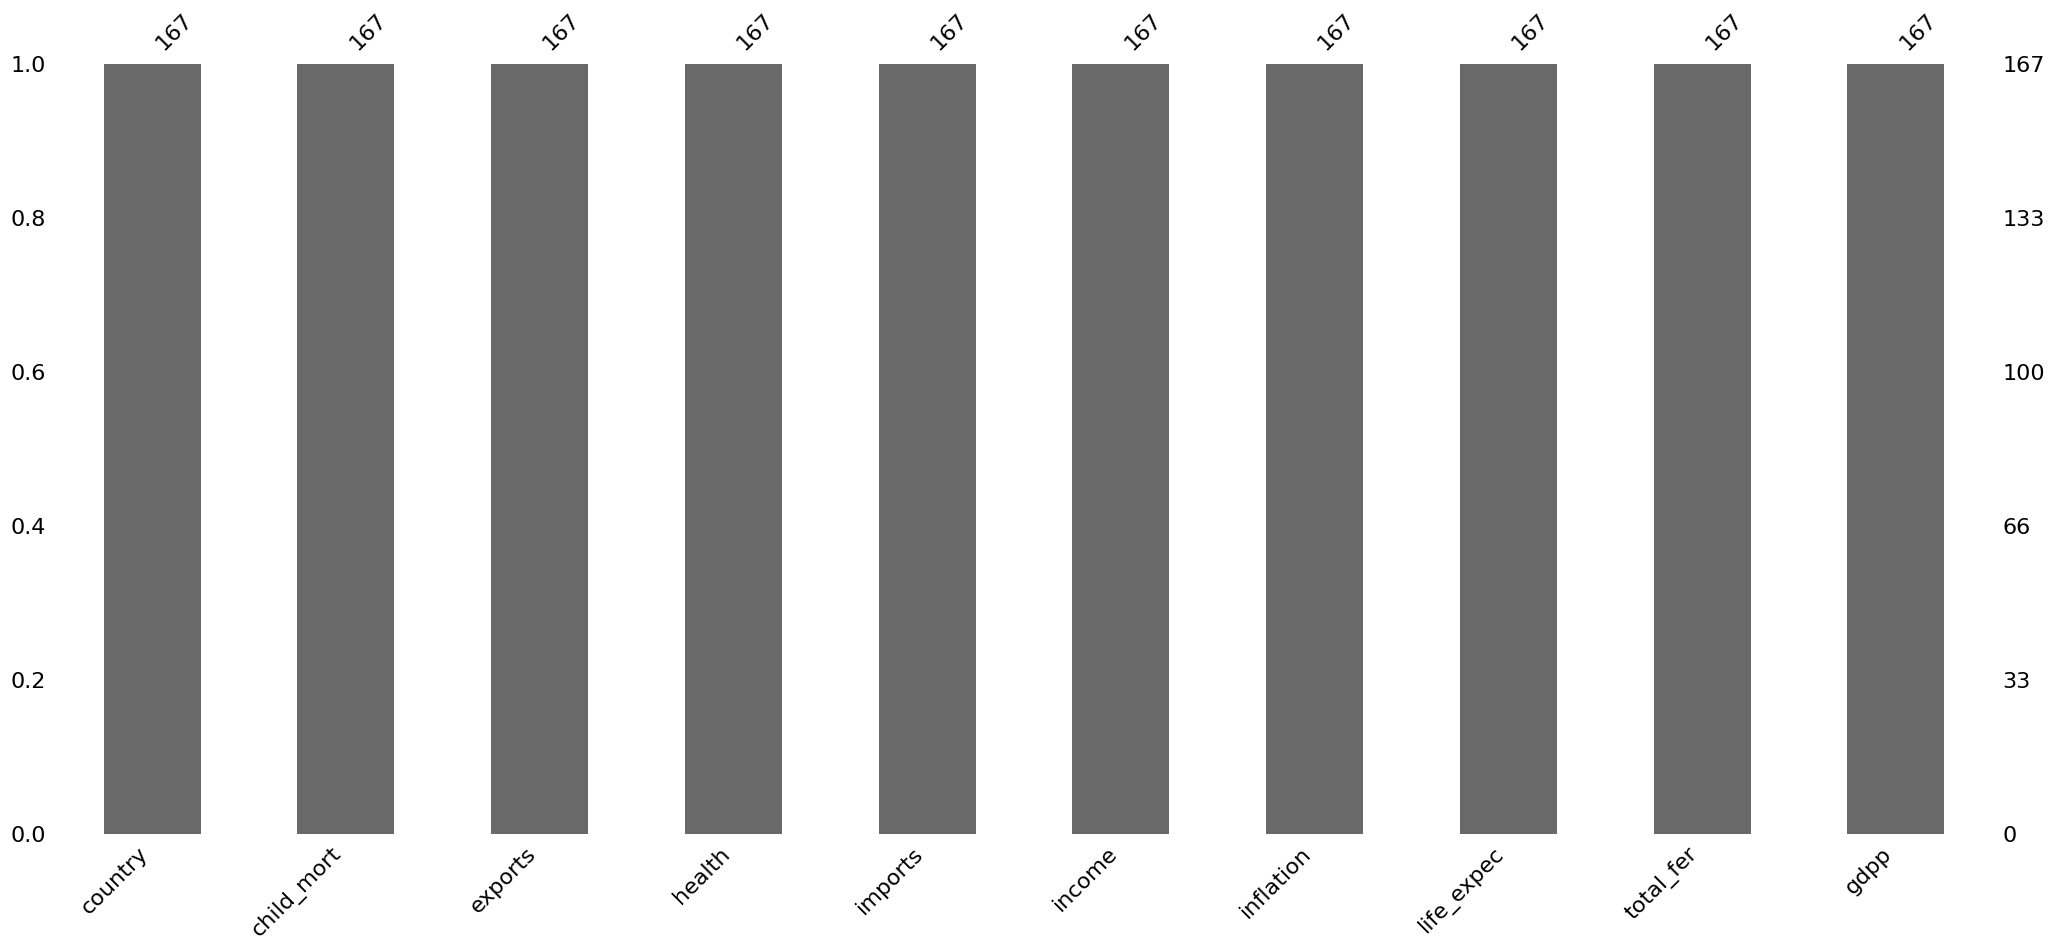

In [6]:
msno.bar(Country_data)
plt.savefig('missing barplot.png')

The above bar plot shows no missing values

## <a id='2.3.3'> 2.3.3  Check for Null & Nan values</a> 

In [7]:
print('Null values: \n{}'.format(Country_data.isnull().sum()))
print('\nNaN values: \n{}'.format(Country_data.isna().sum()))

Null values: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

NaN values: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


There are no Null or NaN values

# <a id='2.4'> 2.4. Datatypes of variables</a> 

In [8]:
# Checking the datatypes of each variable
Country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


* From above datatype information all the data types are in correct format.

# <a id='2.5'> 2.5. Finding Duplicates</a> 

In [9]:
#finding duplicates
print('There are {} duplicates in dataset'.format(len(Country_data[Country_data.duplicated()])))

There are 0 duplicates in dataset


# <a id='2.6'> 2.6. Describing Data</a> 

In [10]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
Country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


# <a id='#2.7'>2.7. Correlation Heatmap</a> 

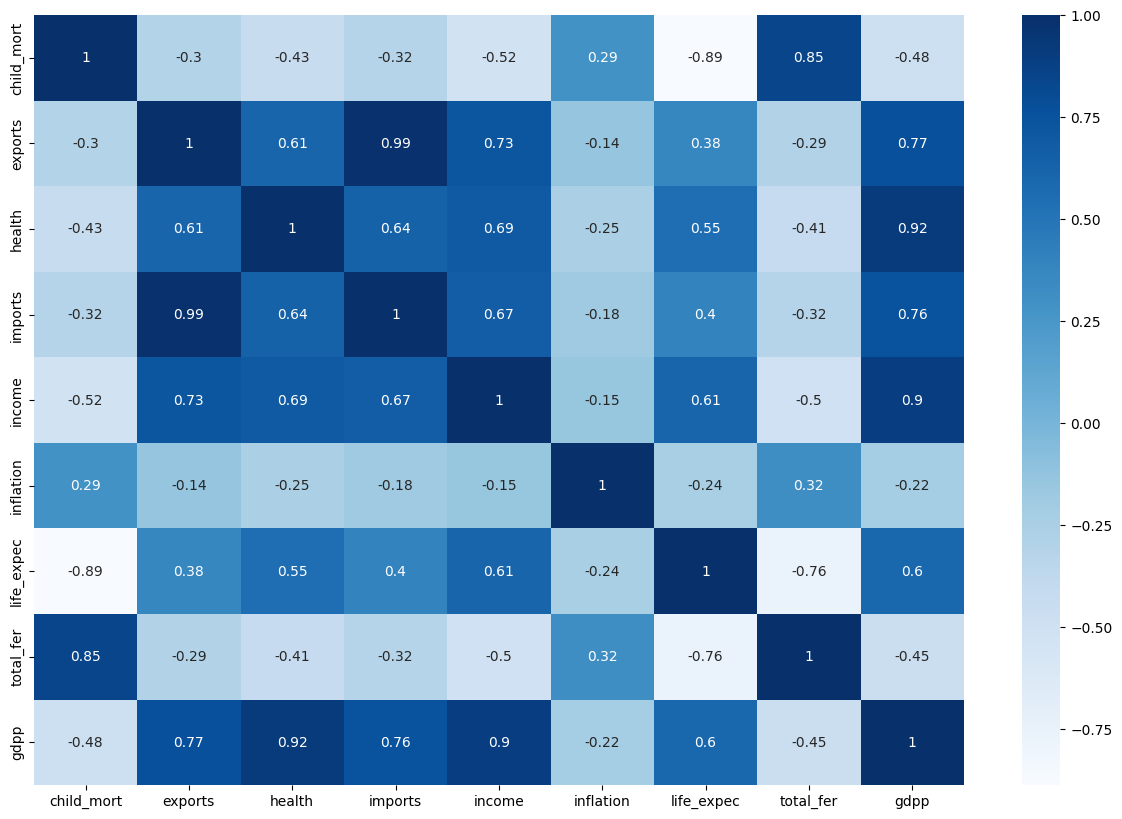

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(Country_data.corr(),annot=True,cmap='Blues').get_figure().savefig('correlation_heatmap.png')

from above correleation heatmap, we can get the following insights:
1. exports is highly correlated with imports. 
2. health, exports, income,imports are highly correlated with gdpp.
3. child_mort is having high negative correlation with life_expec.
4. total_fer is highly positively correlated with child_mort and negatively correlated with life_expec

# <a id='2.8'>2.8. Univariate & Bivariate Analysis</a> 

# Univariate Analysis - BOXPLOT for each Numerical Variable

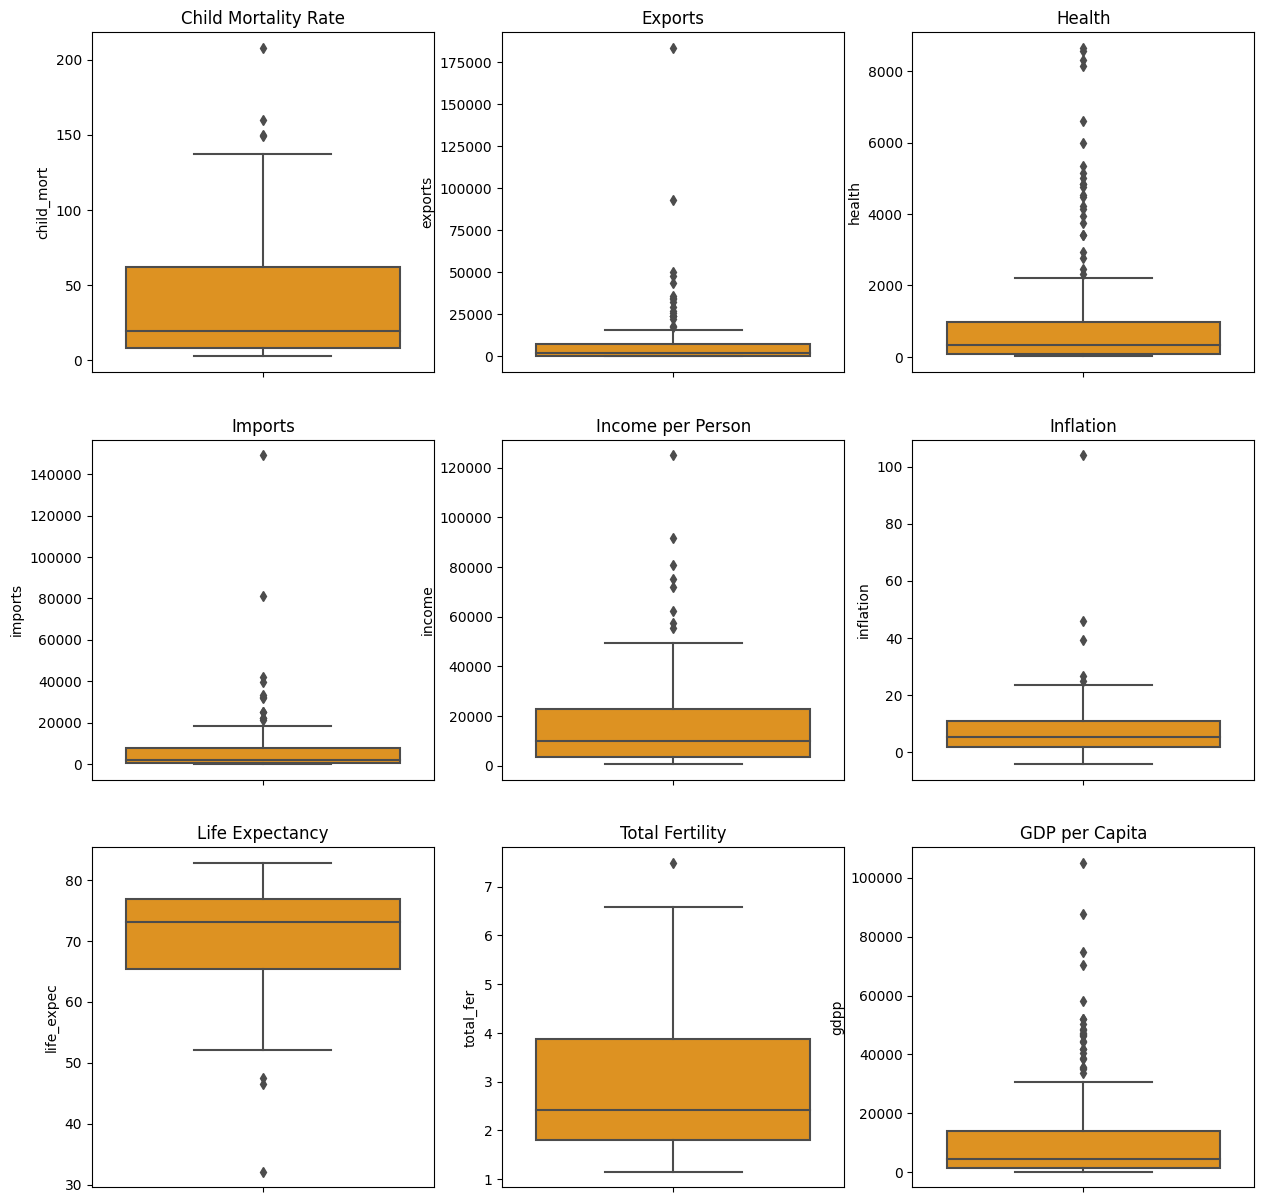

In [12]:
f, axes = plt.subplots(3, 3, figsize=(15, 15))
s=sns.boxplot(y=Country_data.child_mort,ax=axes[0, 0],color="#FC9803")
axes[0, 0].set_title('Child Mortality Rate')
s=sns.boxplot(y=Country_data.exports,ax=axes[0, 1],color="#FC9803")
axes[0, 1].set_title('Exports')
s=sns.boxplot(y=Country_data.health,ax=axes[0, 2],color="#FC9803")
axes[0, 2].set_title('Health')

s=sns.boxplot(y=Country_data.imports,ax=axes[1, 0],color="#fc9803")
axes[1, 0].set_title('Imports')
s=sns.boxplot(y=Country_data.income,ax=axes[1, 1],color="#fc9803")
axes[1, 1].set_title('Income per Person')
s=sns.boxplot(y=Country_data.inflation,ax=axes[1, 2],color="#fc9803")
axes[1, 2].set_title('Inflation')

s=sns.boxplot(y=Country_data.life_expec,ax=axes[2, 0],color="#fc9803")
axes[2, 0].set_title('Life Expectancy')
s=sns.boxplot(y=Country_data.total_fer,ax=axes[2, 1],color="#fc9803")
axes[2, 1].set_title('Total Fertility')
s=sns.boxplot(y=Country_data.gdpp,ax=axes[2, 2],color="#fc9803")
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

From the above table, I conclude the following points:
1. There is atleast one outlier in all the features
2. In case of gdpp and health, there are too many outliers.
3. Since we have limited number of countries(167), removing these outliers would shrink the shape of data and the under-developed countries which are in actual dire need may not contribute to the dataset.
4. There could be a possibility in child_mort's subplot where those outliered-countries could be the needy ones because of the high child-mortality rate.
5. Removing outliers is not a good option as per the above conditions. Hence, **I choose to KEEP outliers**.

# Pair Plot
### Univariate Analysis - KDE 
### Bivariate Analysis - Scatterplot

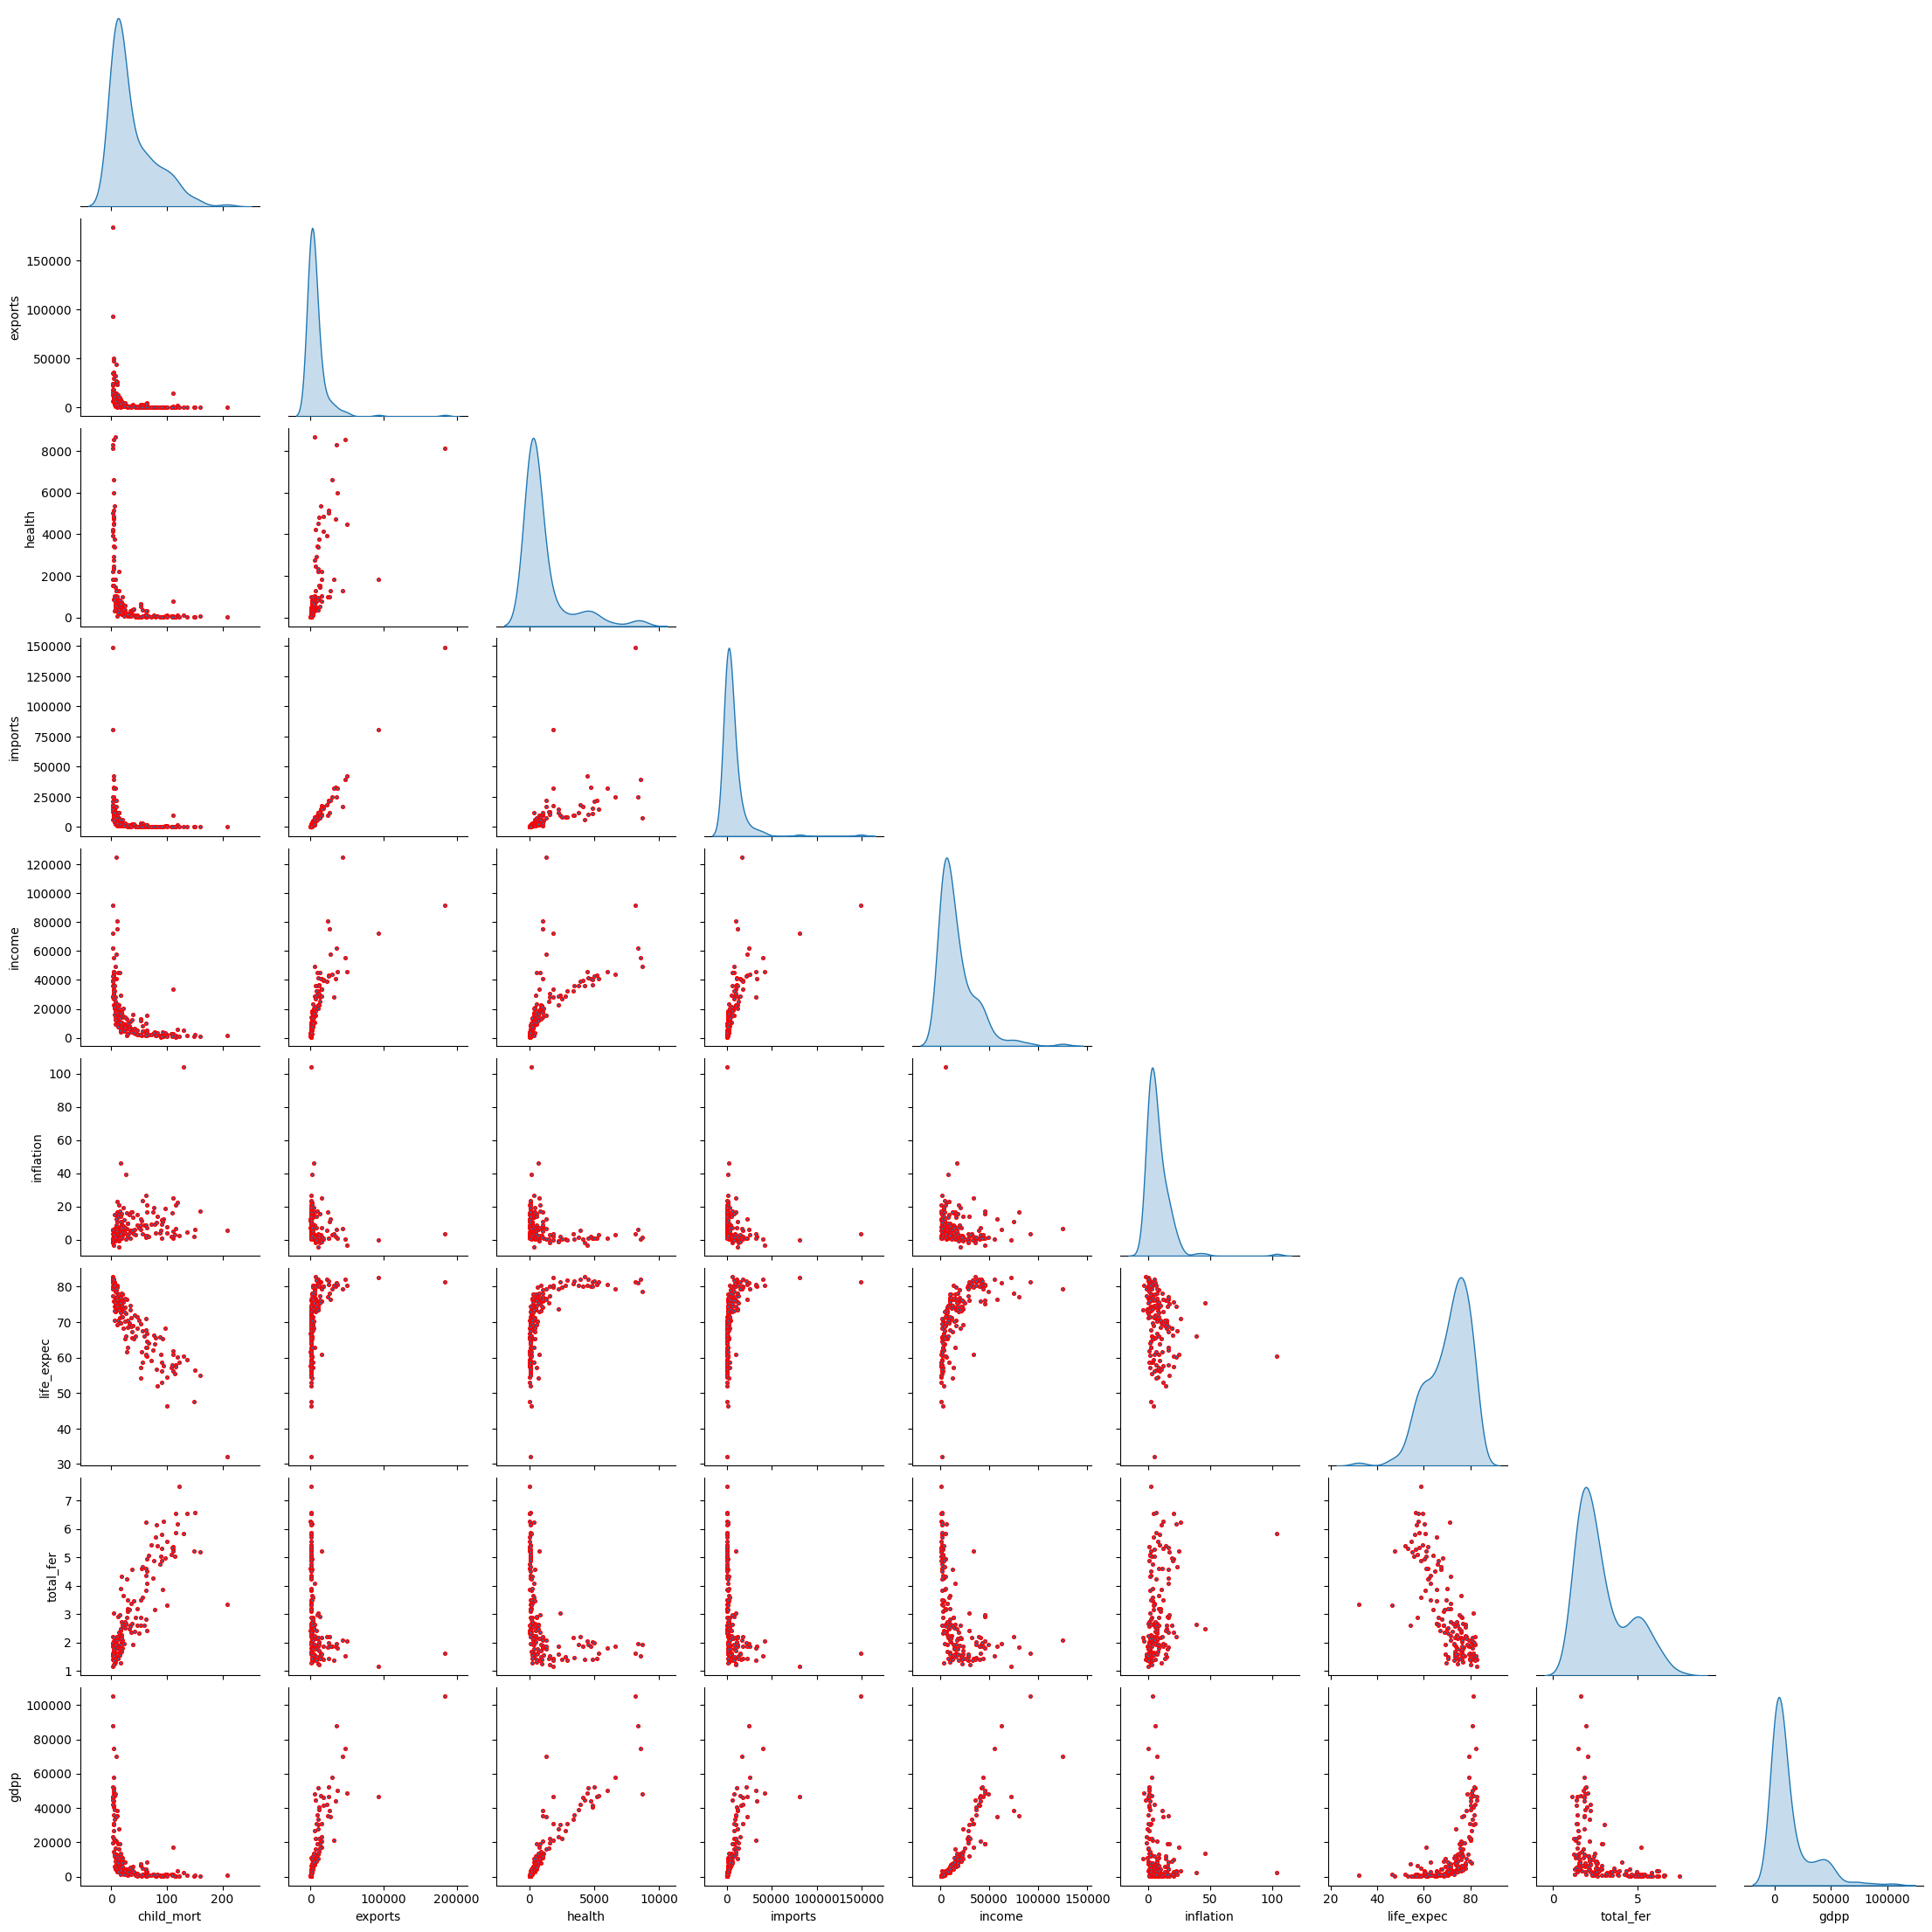

In [13]:
pair2=sns.pairplot(Country_data,diag_kind='kde',corner=True,plot_kws=dict(s=7, edgecolor="r", linewidth=1))
pair2.savefig('pairplot.png')

# From the above plot, I conclude the following points:
### 1. Univariate Analysis
    1. Only Inflation is right-skewed whereas all the rest features are left-skewed.
    2. total_fer and gdpp are bimodal whereas all the rest features are unimodal.
### 2. Bivariate Analysis
    1. Linear relation is found between gdpp-income,imports-exports,total_fer-child_mort
    2. Rectangular hyperbola curve is generated by gdpp-child_mort.
    3. If gdpp is HIGH:
        > child mortality is LOW
        > income is HIGH
        > inflation is LOW
        > life expectancy is HIGH
        > total fertility is LOW
        > health, imports and exports are MEDIUM

# <a id='3'>3. Scaling Data with StandardScaler</a> 

In [14]:
# Droping string feature country name.
features=Country_data.drop('country',1) 

#creating scaler object 
standard_scaler = StandardScaler()
features_scaled = standard_scaler.fit_transform(features)
features_scaled

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# <a id='4'>4. Principal Component Analysis</a> 

In [15]:
#creating pca object
pca = PCA(svd_solver='randomized', random_state=42)
# fiting PCA on the dataset
pca.fit(features_scaled)
#checking components
print("{} pca components.\nList of components\n{}".format(pca.n_components_,pca.components_))

9 pca components.
List of components
[[-0.31639186  0.34288671  0.358535    0.34486492  0.38004113 -0.14308531
   0.34385651 -0.30284224  0.39998795]
 [ 0.47626735  0.39731091  0.1550529   0.37078075  0.12838448  0.22126089
  -0.36981973  0.4597152   0.2006241 ]
 [-0.15001225 -0.03057367 -0.07570322 -0.07217386  0.14576421  0.94841868
   0.19675173 -0.07783431  0.01033941]
 [-0.14805195  0.44942527 -0.59971228  0.46179779 -0.15480592 -0.00762798
  -0.01839465 -0.21392805 -0.36477239]
 [ 0.1019948  -0.03853829 -0.49319984 -0.2527867   0.79407469 -0.13642345
  -0.15404105 -0.02033568  0.08750149]
 [ 0.19658519 -0.03891112  0.18069888 -0.01217988 -0.03814681  0.10840284
  -0.58600986 -0.75390075  0.04538167]
 [ 0.76126725 -0.01366973 -0.06461567  0.02718244 -0.02311312 -0.02207663
   0.58120846 -0.27314534 -0.04402264]
 [ 0.00644411 -0.05526371  0.43007213  0.1311355   0.3938113  -0.00607016
   0.002966    0.03429334 -0.79902242]
 [-0.00495137 -0.71792388 -0.13034593  0.66568664  0.079011

# <a id='4.1'>4.1. Explained Variance Ratio Barplot</a> 

The cumulative variance of the first 5 principal components is 0.96395


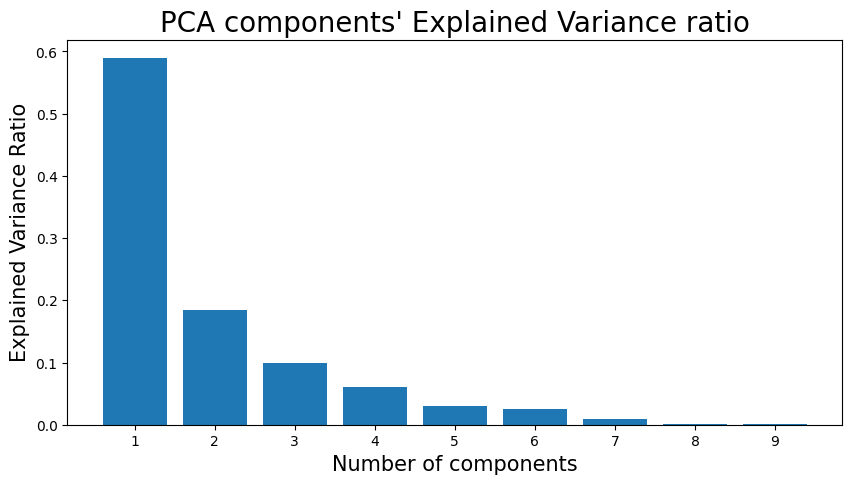

In [16]:
#creating variable for no. of components
comp=range(1,pca.n_components_+1)
#cumulative variance of the first 5 principal components
print("The cumulative variance of the first 5 principal components is {}".format(round(pca.explained_variance_ratio_.cumsum()[4],5)))
#plotting barplot for pca components' explained variance ratio
plt.figure(figsize=(10,5))
plt.bar(comp,pca.explained_variance_ratio_)
plt.xticks(comp)
plt.title('PCA components\' Explained Variance ratio',fontsize=20)
plt.xlabel('Number of components',fontsize=15)
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.savefig('EVR PCA Barplot.png')
plt.show()

# <a id='4.2'>4.2. Scree Plot</a> 

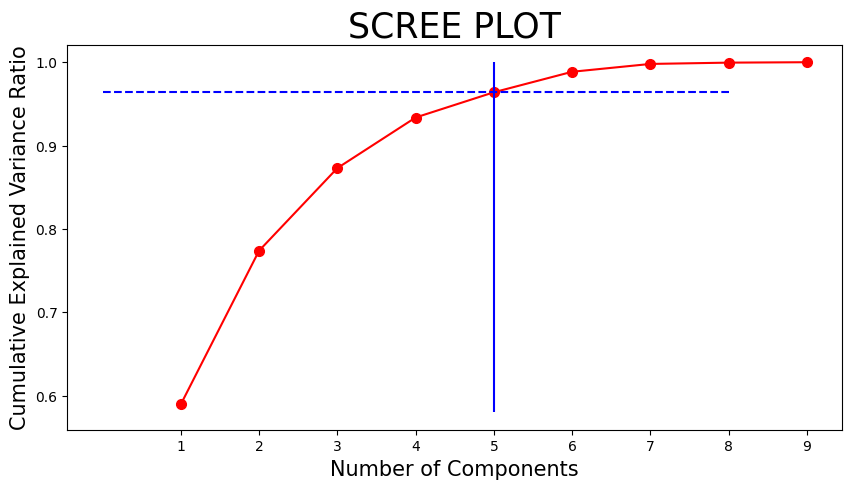

In [17]:
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.plot(comp,np.cumsum(pca.explained_variance_ratio_),marker='o',markersize=7,color='r')
plt.title('SCREE PLOT',fontsize=25)
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=15)
plt.vlines(x=5, ymax=1, ymin=0.58, colors="b", linestyles="-")
plt.hlines(y=pca.explained_variance_ratio_.cumsum()[4], xmax=8, xmin=0, colors="b", linestyles="--")
plt.xticks(comp)
plt.savefig('EVR PCA Screeplot.png')
plt.show()

# <a id='4.3'>4.3. Visualising PCA Components</a> 

#### From above scree plot, Around 96% of the information is being explained by 5 components.

In [18]:
#creating dataframe of first 5 PCA Components
colnames = list(features.columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


In [19]:
%matplotlib inline
fig = plt.figure(figsize = (10,5))
sns.scatterplot(pca_data.PC1, pca_data.PC2,hue=pca_data.Features,marker='o',s=70)
plt.title('Scatterplot',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=15)
plt.savefig('PCA Scatterplot.png')
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x500 with 0 Axes>

- From the above plot, we can see the first component is in the dirction where the imports, exports, gdpp,income, health,life_expec are heavy and second component is in the direction where child_mort , total_fer is more.
- If you recall, correlation between imports and exports was 0.99. Now we can surely confirm it by looking the above plot.

# <a id='4.4'>4.4. Performing Incremental PCA</a>

In [20]:
#Finally let's go ahead and do dimensionality reduction using the 5 Principal Components
#using Incremental PCA over normal PCA will use less Memory.
ipca = IncrementalPCA(n_components=5)
ipca = ipca.fit_transform(features_scaled)
ipcat = np.transpose(ipca)
pca_data = pd.DataFrame({'PC1':ipcat[0],'PC2':ipcat[1],'PC3':ipcat[2],'PC4':ipcat[3],'PC5':ipcat[4]})
pca_data

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132
165,-1.802840,0.584669,1.179551,0.051510,-0.274608


# <a id='5'>5. K Means Clustering</a> 

In [21]:
#creating list ks for no. of clusters
ks=list(range(1,10))
plt.figure(figsize=(10,5))
ssd = []
#iterating ks values and fitting each value to the kmeans model
for num_clusters in ks:
    model = KMeans(n_clusters = num_clusters, max_iter=50)
    model.fit(pca_data.iloc[:,:5])
    ssd.append(model.inertia_)

<Figure size 1000x500 with 0 Axes>

# <a id='5.1'>5.1 Elbow Method</a> 

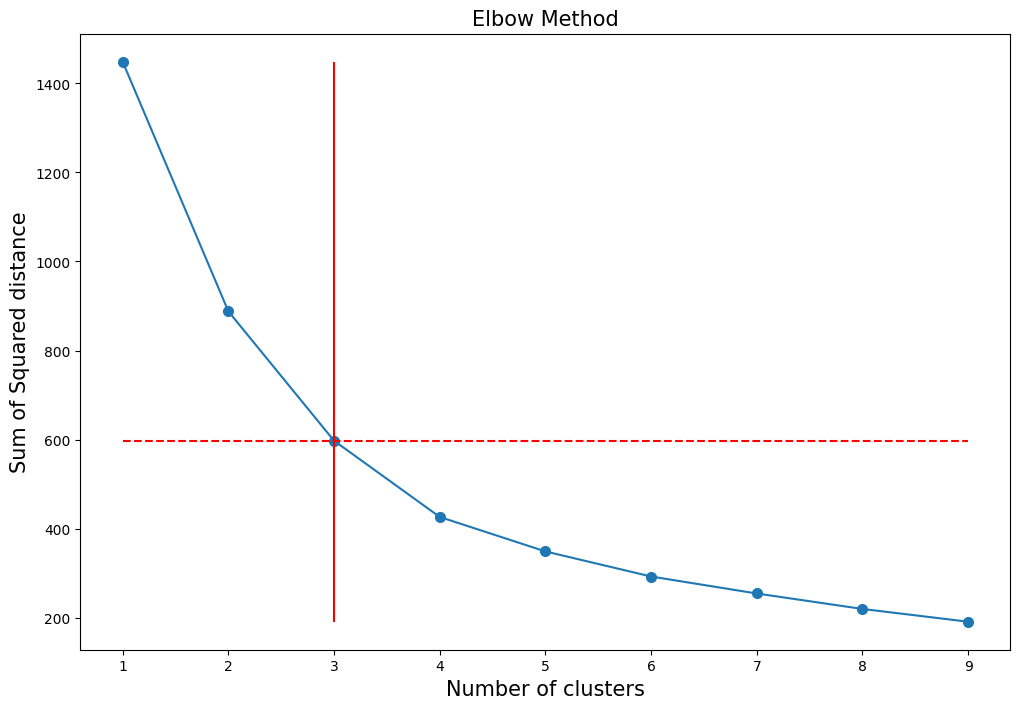

In [22]:
plt.figure(figsize = (12,8))
plt.plot(ks,ssd,marker='o',markersize=7)
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="-")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="--")
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.savefig('Kmeans elbow.png')
plt.show()

# <a id='5.2'>5.2 Visualising clusters on components</a> 

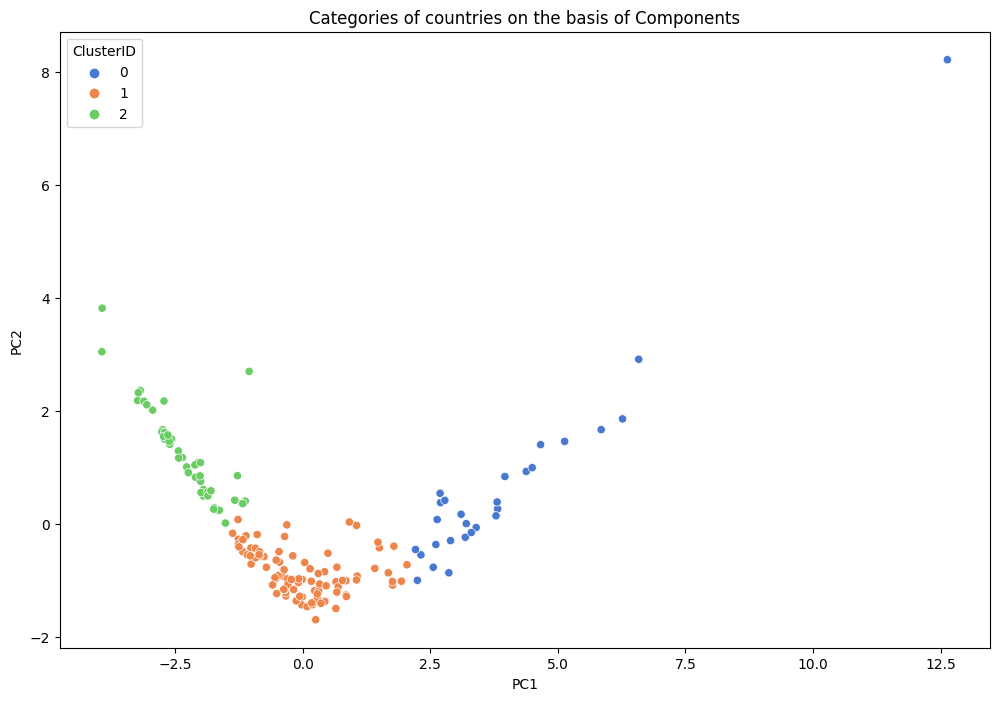

In [23]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
kmeans.fit(pca_data.iloc[:,:5])
#adding produced labels to pca_data 
pca_data['ClusterID']= pd.Series(kmeans.labels_)
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=pca_data,palette="muted")
plt.title('Categories of countries on the basis of Components')
plt.savefig('Kmeans pca scatter.png')
plt.show()

- From above plots, we can clearly see the 3 clusters .

- Now we are merging clusters with the original dataset.

In [24]:
final_df=pd.merge(Country_data,pca_data.loc[:,'ClusterID'], left_index=True,right_index=True)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [25]:
#calculating mean of the required columns(child_mort, income, gdpp) for comparison
Cluster_GDPP=pd.DataFrame(final_df.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(final_df.groupby(["ClusterID"]).child_mort.mean())
Cluster_income=pd.DataFrame(final_df.groupby(["ClusterID"]).income.mean())
K_mean_df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income], axis=1)
K_mean_df

,gdpp,child_mort,income
ClusterID,,,
0,48114.285714,5.046429,50178.571429
1,7979.912088,20.357143,13968.021978
2,1909.208333,91.610417,3897.354167


- Analysing the clusters by comparing how the [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

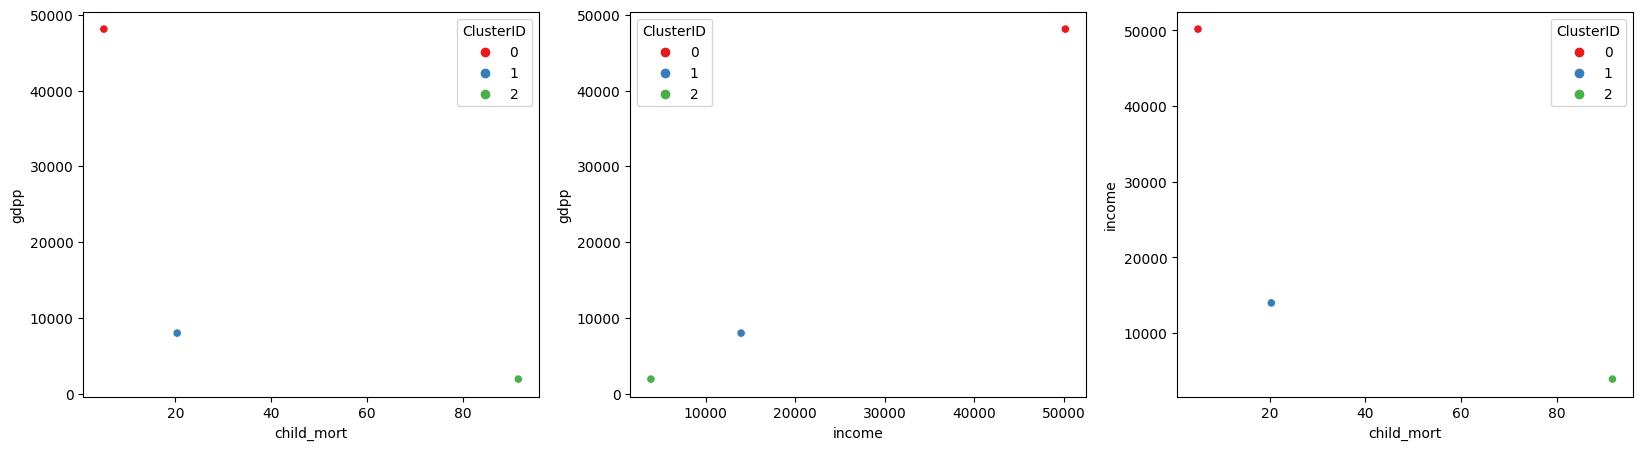

In [26]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

s=sns.scatterplot(x='child_mort',y='gdpp',data=K_mean_df,hue=K_mean_df.index,palette='Set1',ax=axes[0])
s=sns.scatterplot(x='income',y='gdpp',data=K_mean_df,hue=K_mean_df.index,palette='Set1',ax=axes[1])
s=sns.scatterplot(x='child_mort',y='income',data=K_mean_df,hue=K_mean_df.index,palette='Set1',ax=axes[2])
s.get_figure().savefig('comparison scatterplots.png')

* Countries with high gdpp and low child mortality are Developed countries
* Countries with low gdpp and low child mortality are Developing countries
* Countries with low gdpp and high child mortality are Under-developing countries

Therefore let's rename indexes as:
### ClusterID 0 = Developing countries<br>
### ClusterID 1 = Developed countries<br>
### ClusterID 2 = Under-developed countries<br>

In [27]:
K_mean_df.rename(index={0: 'Developing'},inplace=True)
K_mean_df.rename(index={1: 'Developed'},inplace=True)
K_mean_df.rename(index={2: 'Under-developed'},inplace=True)

# <a id='5.3'>5.3. Clusters based comparisons</a>
#### <a href='#5.3.1'>5.3.1 BarPlot</a>
#### <a href='#5.3.2'>5.3.2 ScatterPlot</a>
#### <a href='#5.3.3'>5.3.3 BoxPlot</a>

## <a id='5.3.1'>5.3.1 BarPlot</a>

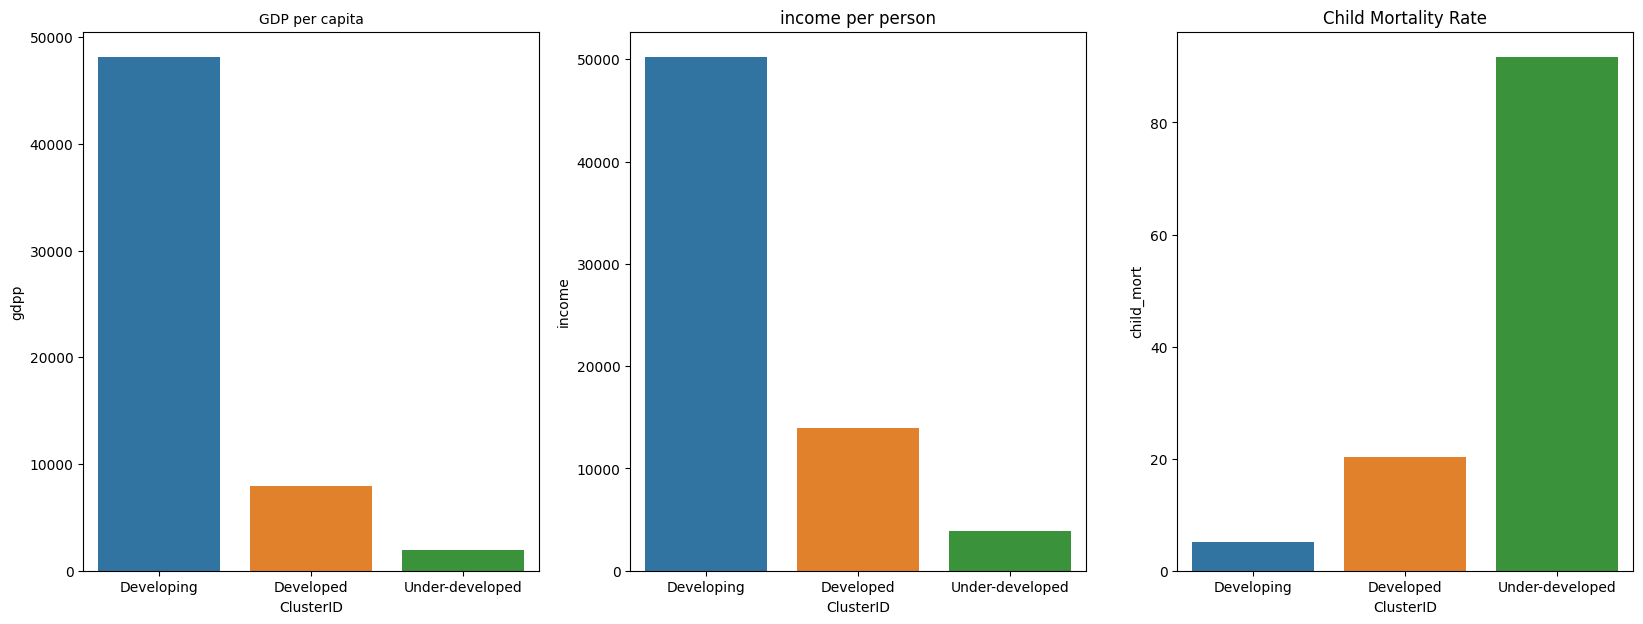

In [28]:
f, axes = plt.subplots(1, 3, figsize=(20,7))

s=sns.barplot(x=K_mean_df.index,y='gdpp',data=K_mean_df,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=10)

s=sns.barplot(x=K_mean_df.index,y='income',data=K_mean_df,ax=axes[1])
axes[1].set_title('income per person')

s=sns.barplot(x=K_mean_df.index,y='child_mort',data=K_mean_df,ax=axes[2])
axes[2].set_title('Child Mortality Rate')

s.get_figure().savefig('comparison subplots.png')
plt.show()

- Above bar chart shows that, 
1. All the developed countries are having high GDP per capita values, developing countries are having average GDP per capita values and poor countries are having the least GDPP values.
2. All the developed countries are having high income per person, developing countries are having average income per person and poor countries are having the least income per person.
3. All the developed countries are having low number of death of children under 5 years of age per 1000 live births, developing countries are having average death rate and poor countries are having the least death rate.

## <a id='5.3.2'>5.3.2 ScatterPlot</a>

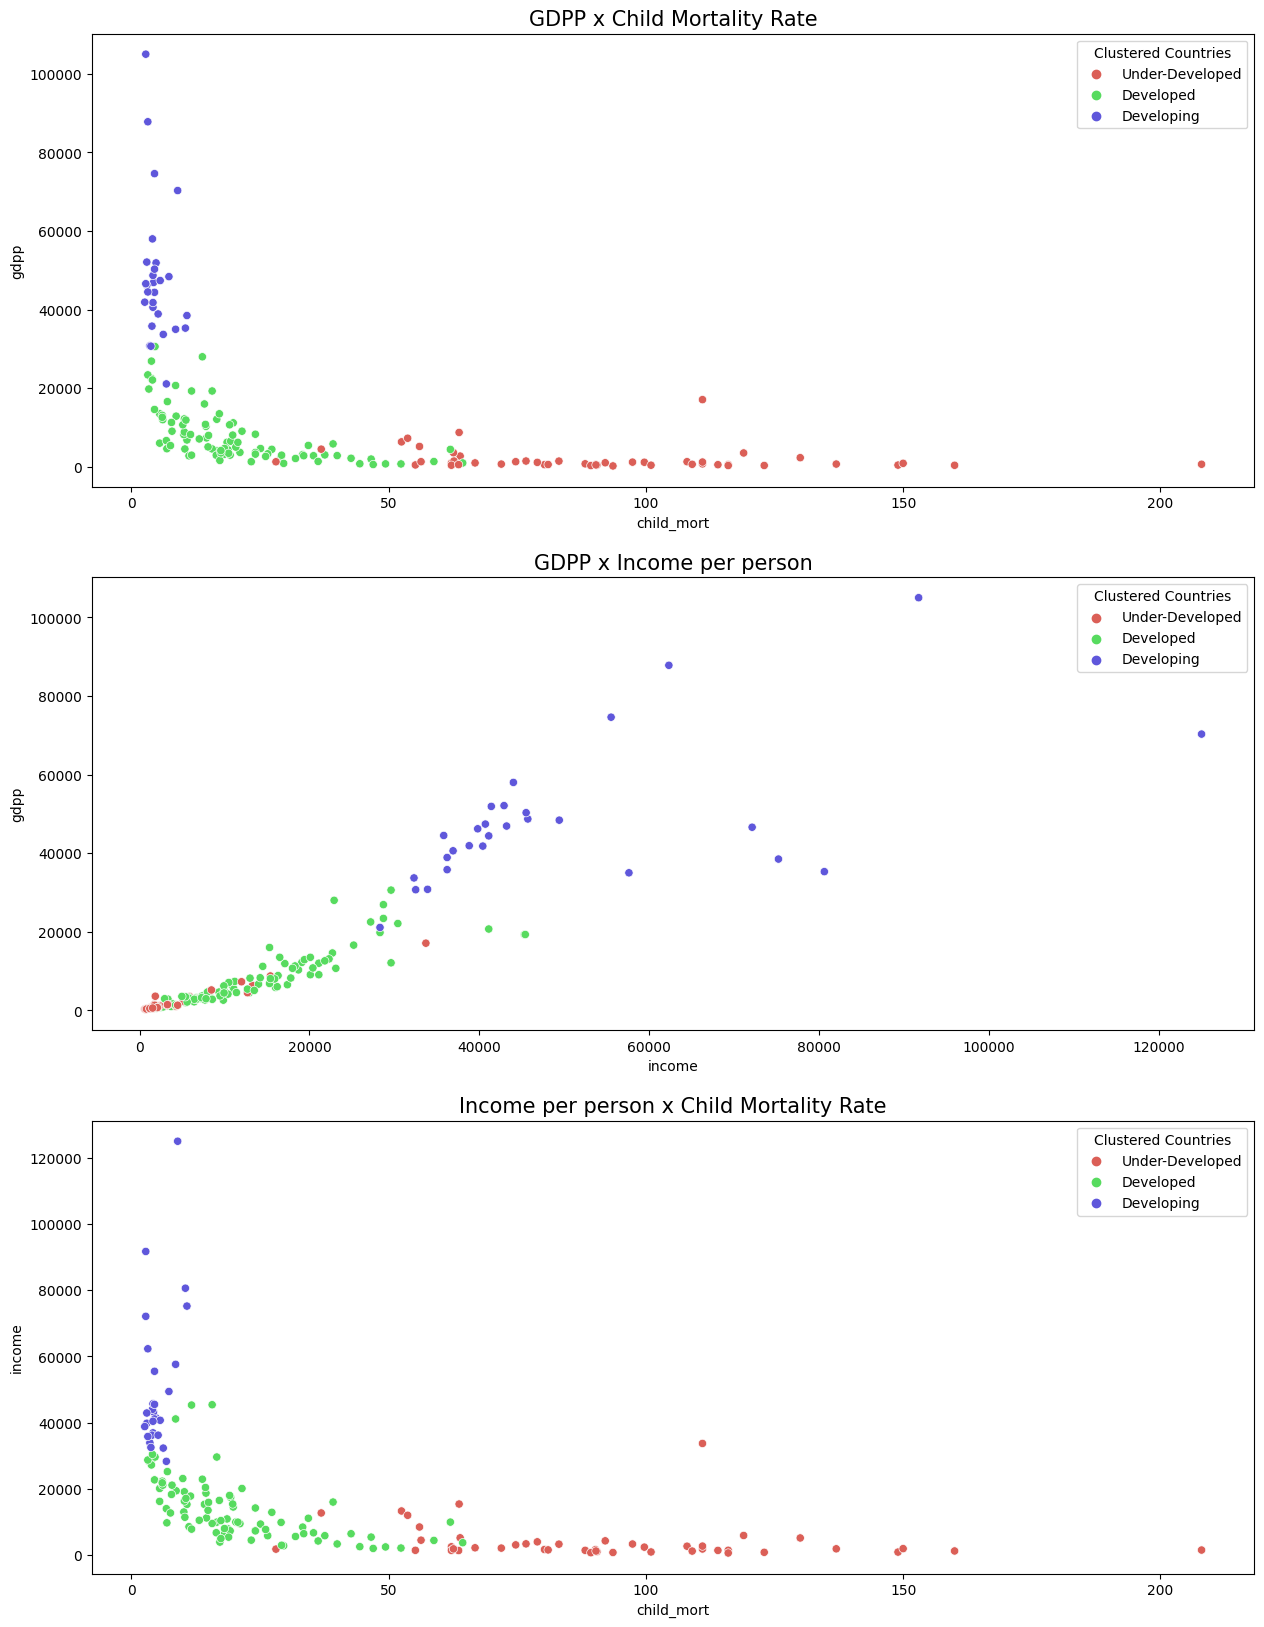

In [29]:
for i,cluster in enumerate(final_df.ClusterID):
    if(cluster==0):
        final_df.loc[i,'Clustered Countries']='Developing'
    elif(cluster==1):
        final_df.loc[i,'Clustered Countries']='Developed'
    else:
        final_df.loc[i,'Clustered Countries']='Under-Developed'
        
f, axes = plt.subplots(3, 1, figsize=(15,20))
s=sns.scatterplot(x='child_mort',y='gdpp',hue='Clustered Countries',legend='full',data=final_df,palette=sns.color_palette("hls", 3),ax=axes[0])
axes[0].set_title('GDPP x Child Mortality Rate',fontsize=15)
s=sns.scatterplot(x='income',y='gdpp',hue='Clustered Countries',legend='full',data=final_df,palette=sns.color_palette("hls", 3),ax=axes[1])
axes[1].set_title('GDPP x Income per person',fontsize=15)
s=sns.scatterplot(x='child_mort',y='income',hue='Clustered Countries',legend='full',data=final_df,palette=sns.color_palette("hls", 3),ax=axes[2])
axes[2].set_title('Income per person x Child Mortality Rate',fontsize=15)
s.get_figure().savefig('scatterplot subplots.png')
plt.show()

From above scatter plot :
1. In gdpp x child_mort, there is some clustering where gdpp is more, there child-mort is low, which is a FACT.
2. In gdpp x income, there is some clustering where gdpp is more, then income is also more.
3. In income x child_mort, there is some clustering where if child_mort is more, then income is less.

## <a id='5.3.3'>5.3.3 BoxPlot</a>

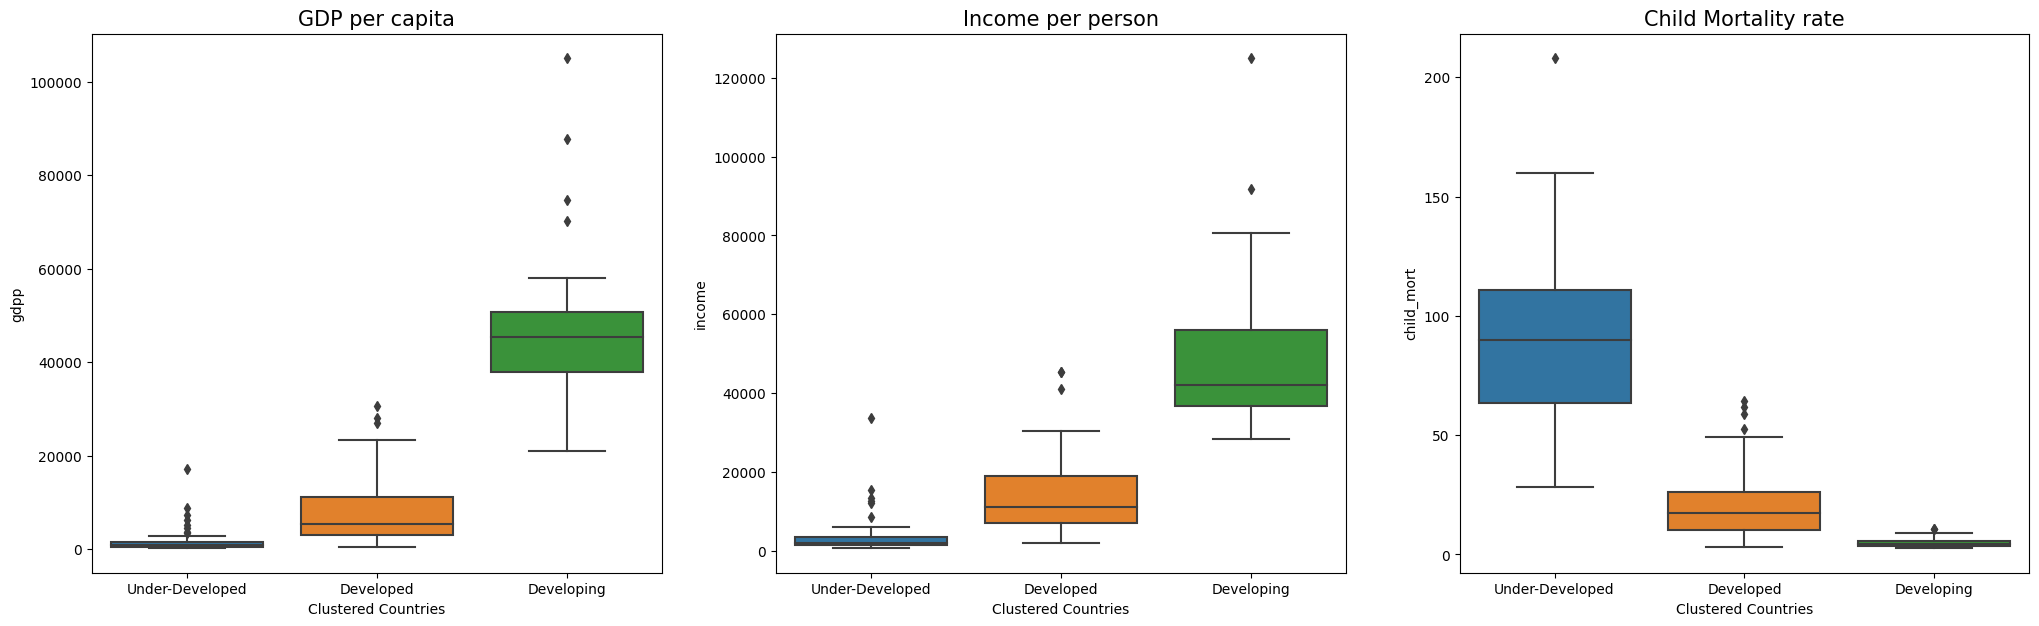

In [30]:
f, axes = plt.subplots(1, 3, figsize=(25,7))
sns.boxplot(x='Clustered Countries',y='gdpp',data=final_df,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=15)
sns.boxplot(x='Clustered Countries',y='income',data=final_df,ax=axes[1])
axes[1].set_title('Income per person',fontsize=15)
sns.boxplot(x='Clustered Countries',y='child_mort',data=final_df,ax=axes[2])
axes[2].set_title('Child Mortality rate',fontsize=15)
s.get_figure().savefig('comparison subplots.png')
plt.show()

# <a id='5.4'>5.4. Bar Charts of clustered countries wrt gdpp, income, child mortality</a> 
1. <a href='#5.4.1'>Developed Countries</a> 
2. <a href='#5.4.2'>Developing Countries</a> 
3. <a href='#5.4.3'>Under-Developed Countries</a> 

## <a id='5.4.1'>Developed Countries</a> 

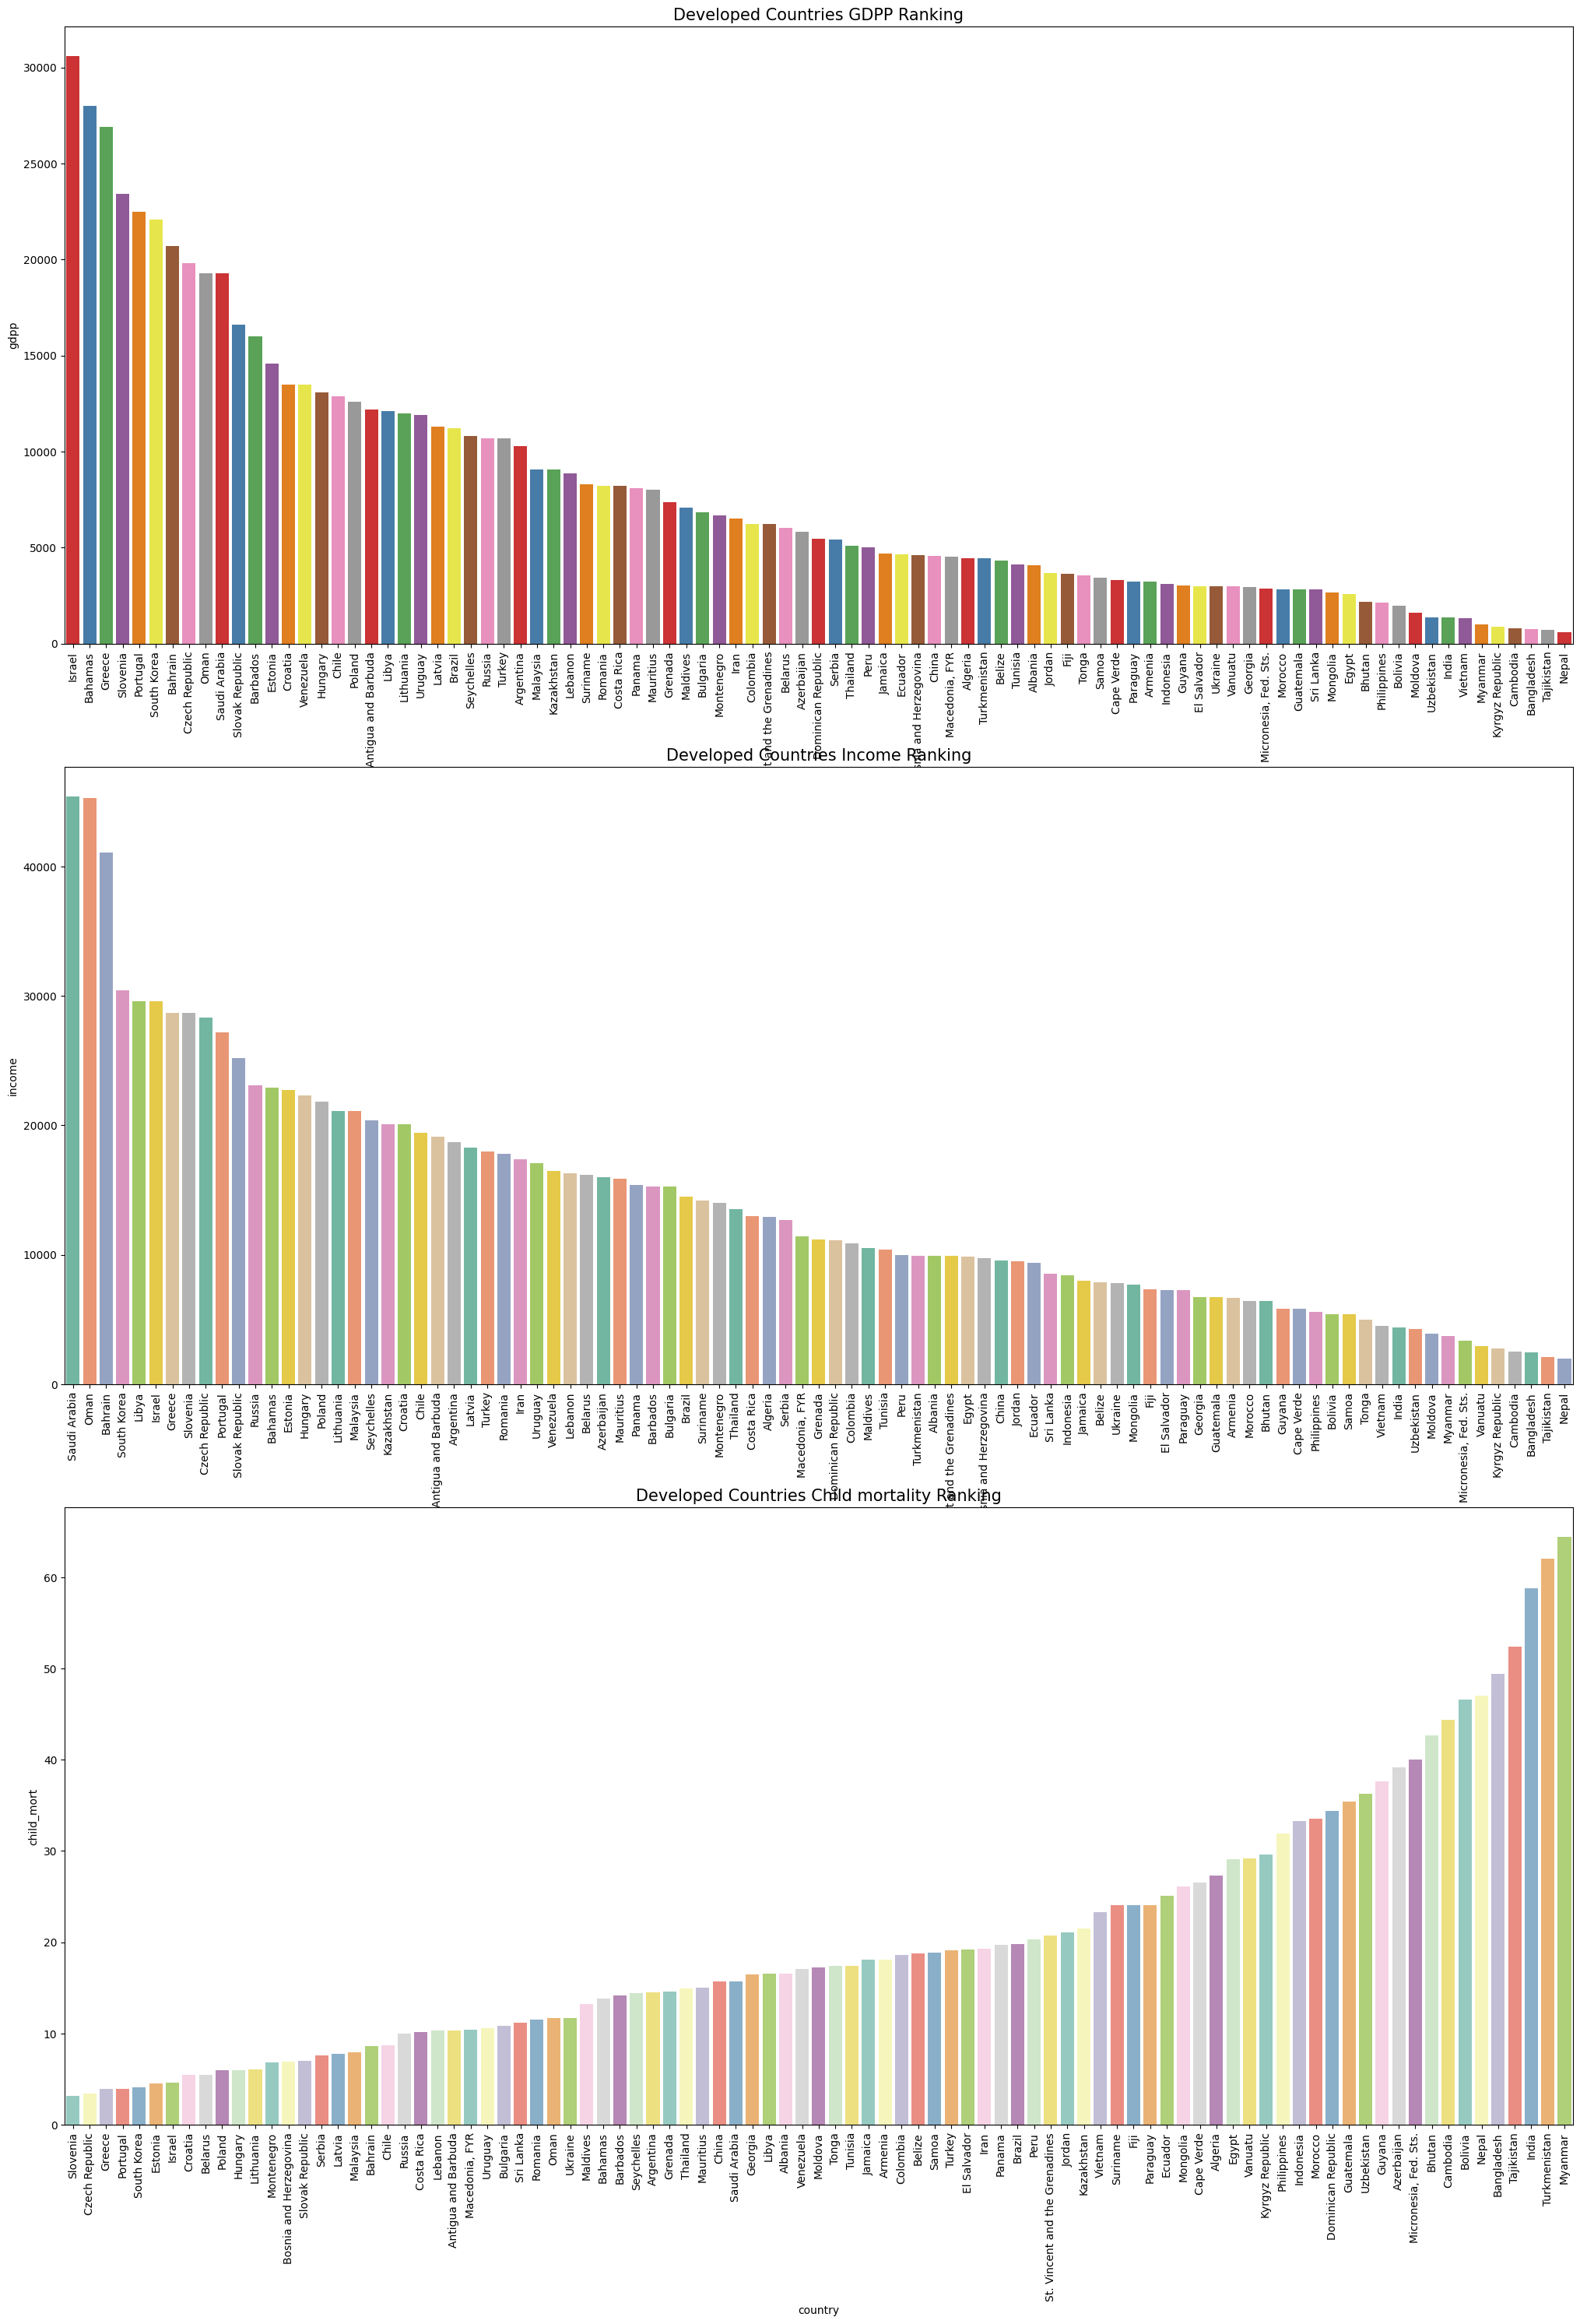

In [31]:
f, axes = plt.subplots(3, 1, figsize=(25,35))

gdp_developed=final_df[final_df['Clustered Countries']=='Developed'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_developed,palette='Set1',ax=axes[0])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Developed Countries GDPP Ranking',fontsize=15)

income_developed=final_df[final_df['Clustered Countries']=='Developed'].sort_values(by='income',ascending=False)
s=sns.barplot(x='country',y='income',data=income_developed,palette='Set2',ax=axes[1])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Developed Countries Income Ranking',fontsize=15)

child_developed=final_df[final_df['Clustered Countries']=='Developed'].sort_values(by='child_mort')
s=sns.barplot(x='country',y='child_mort',data=child_developed,palette='Set3',ax=axes[2])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Developed Countries Child mortality Ranking',fontsize=15)

s.get_figure().savefig('DEVELOPED Countries rankings.png')
plt.show()

In [32]:
#top 10 developed countries based on GDPP
print('top 10 developed countries based on high GDPP\n')
for countries in gdp_developed.country[:10]:
    print(countries)

#top 10 developed countries based on income
print('\ntop 10 developed countries based on high income\n')
for countries in income_developed.country[:10]:
    print(countries)
    
#top 10 developed countries based on childmort
print('\ntop 10 developed countries based on child low mortality\n')
for countries in child_developed.country[:10]:
    print(countries)

top 10 developed countries based on high GDPP

Israel
Bahamas
Greece
Slovenia
Portugal
South Korea
Bahrain
Czech Republic
Oman
Saudi Arabia

top 10 developed countries based on high income

Saudi Arabia
Oman
Bahrain
South Korea
Libya
Israel
Greece
Slovenia
Czech Republic
Portugal

top 10 developed countries based on child low mortality

Slovenia
Czech Republic
Greece
Portugal
South Korea
Estonia
Israel
Croatia
Belarus
Poland


## <a id='5.4.2'>Developing Countries</a> 

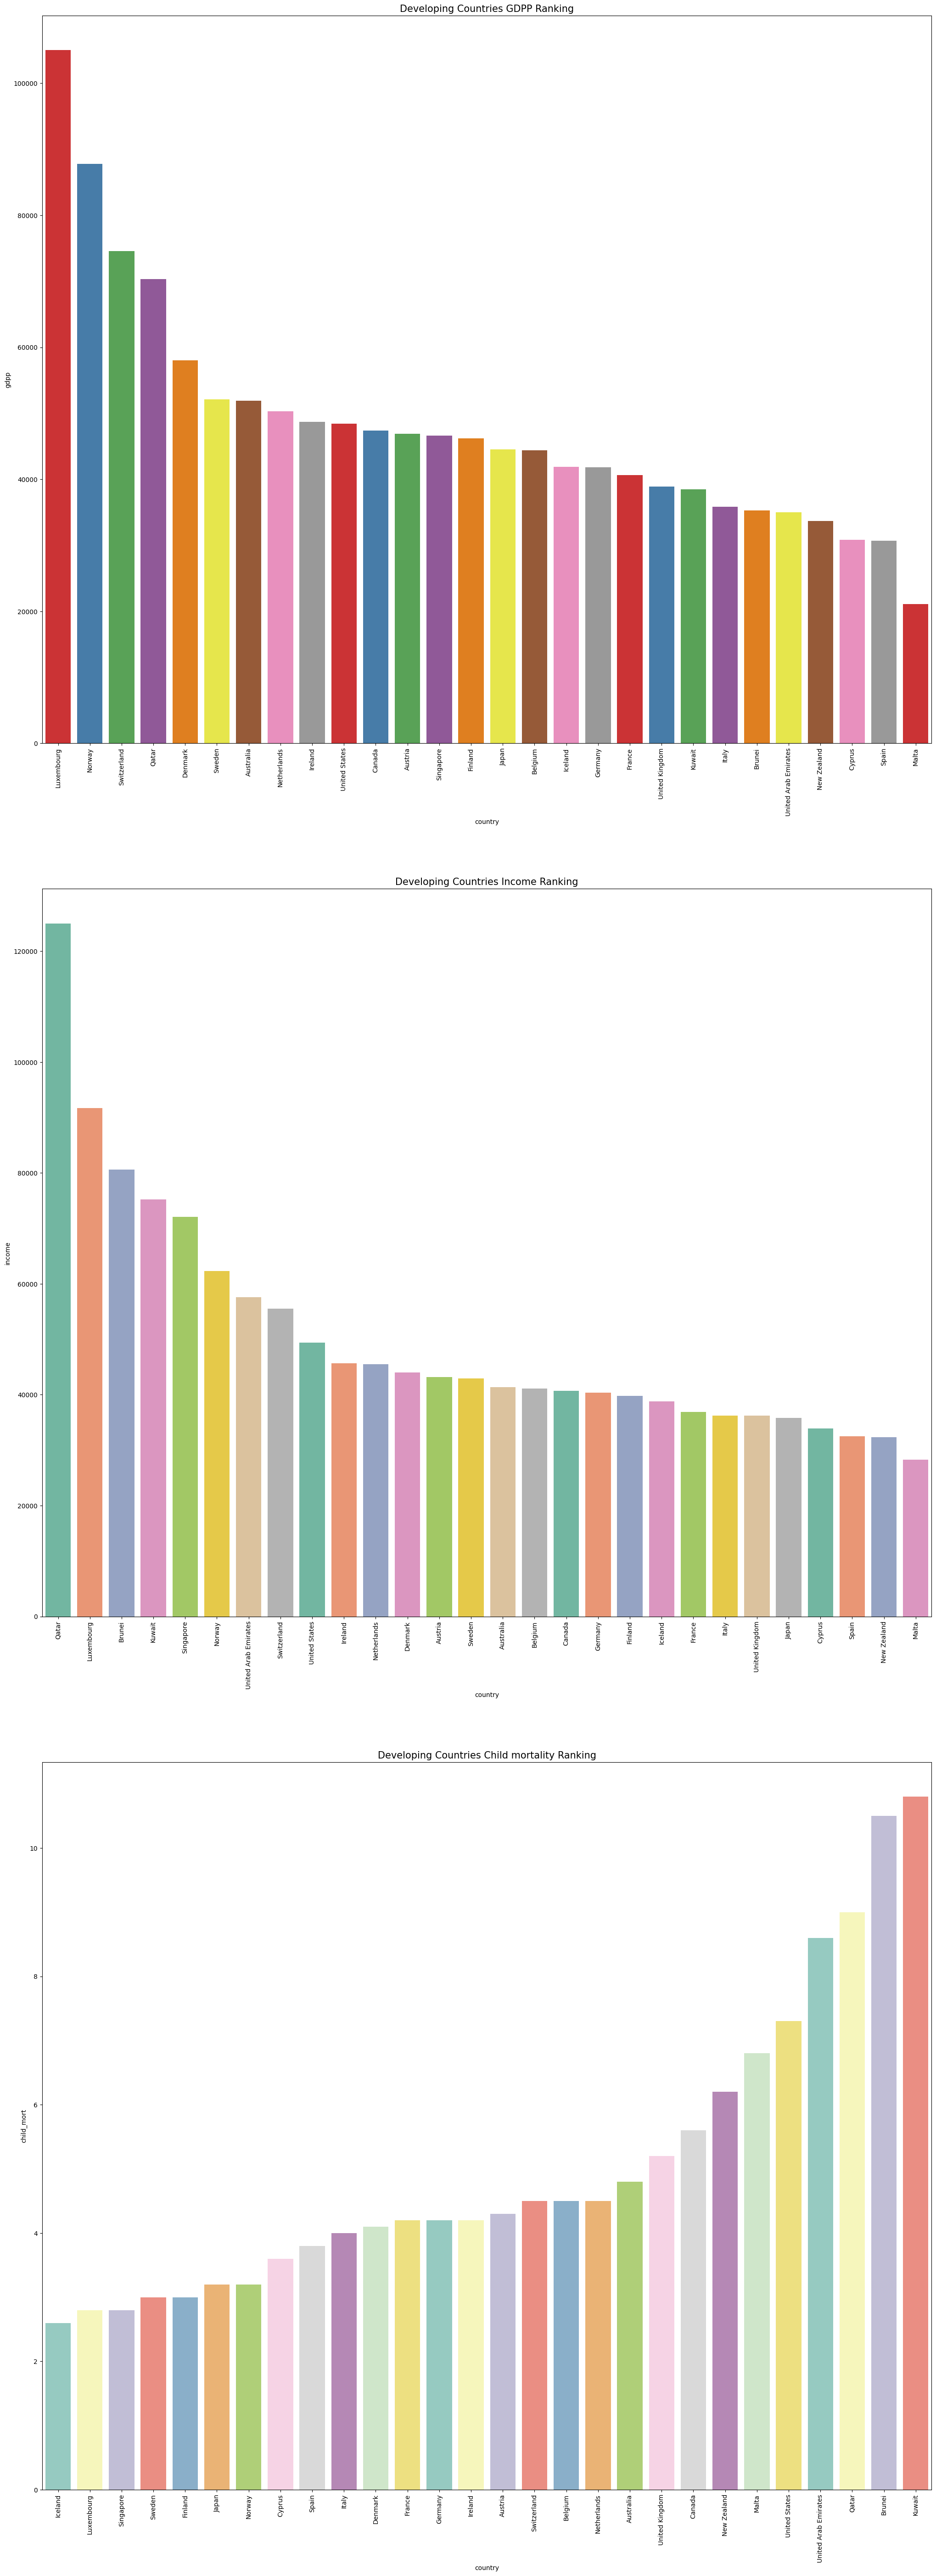

In [33]:
f, axes = plt.subplots(3, 1, figsize=(25,70))

gdp_developing=final_df[final_df['Clustered Countries']=='Developing'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_developing,palette='Set1',ax=axes[0])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Developing Countries GDPP Ranking',fontsize=15)

income_developing=final_df[final_df['Clustered Countries']=='Developing'].sort_values(by='income',ascending=False)
s=sns.barplot(x='country',y='income',data=income_developing,palette='Set2',ax=axes[1])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Developing Countries Income Ranking',fontsize=15)

child_developing=final_df[final_df['Clustered Countries']=='Developing'].sort_values(by='child_mort')
s=sns.barplot(x='country',y='child_mort',data=child_developing,palette='Set3',ax=axes[2])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Developing Countries Child mortality Ranking',fontsize=15)

s.get_figure().savefig('DEVELOPING Countries rankings.png')
plt.show()

## <a id='5.4.3'>Under-Developed Countries</a> 

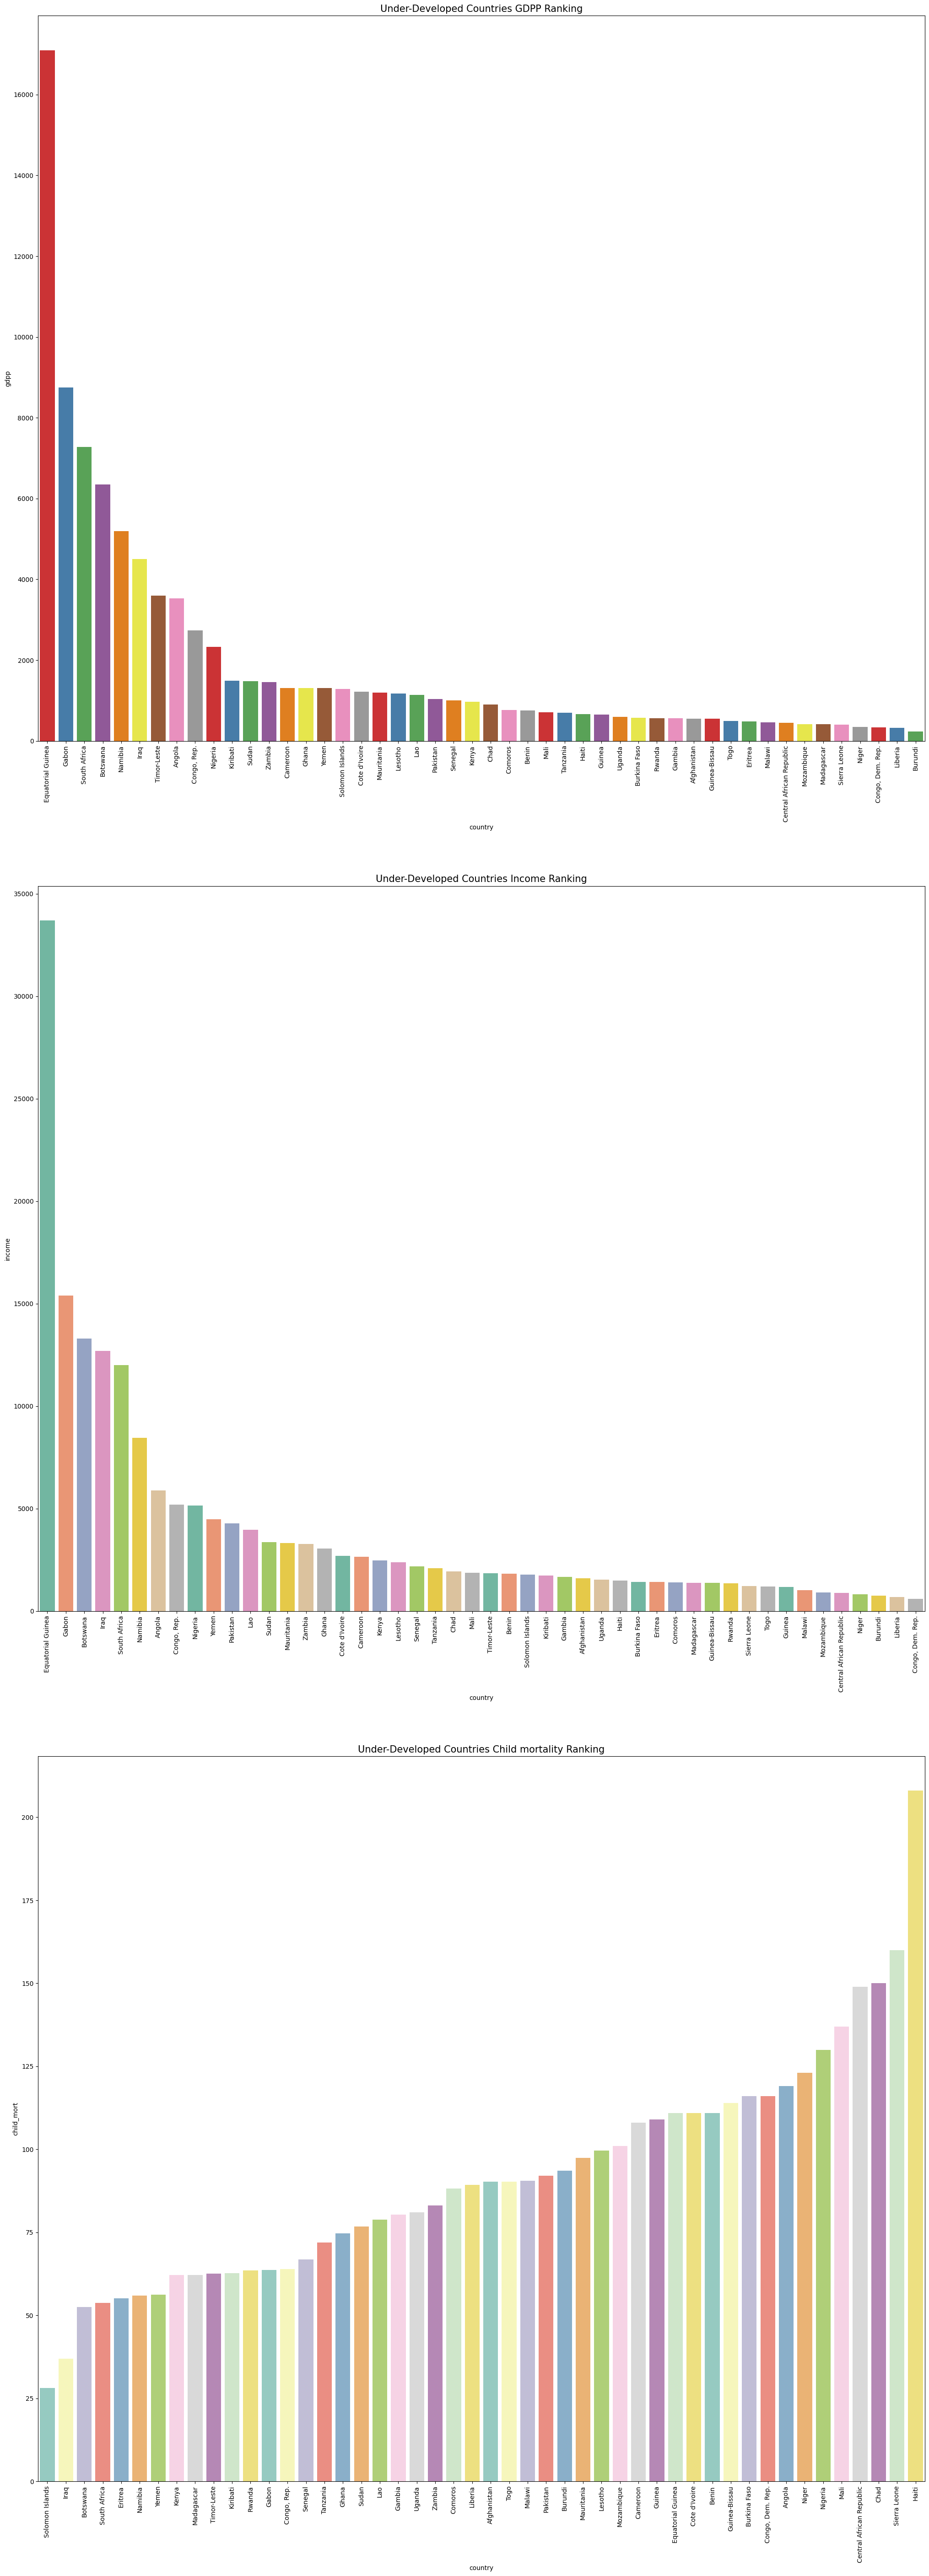

In [34]:
f, axes = plt.subplots(3, 1, figsize=(25,70))

gdp_under=final_df[final_df['Clustered Countries']=='Under-Developed'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_under,palette='Set1',ax=axes[0])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Under-Developed Countries GDPP Ranking',fontsize=15)

income_under=final_df[final_df['Clustered Countries']=='Under-Developed'].sort_values(by='income',ascending=False)
s=sns.barplot(x='country',y='income',data=income_under,palette='Set2',ax=axes[1])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Under-Developed Countries Income Ranking',fontsize=15)

child_under=final_df[final_df['Clustered Countries']=='Under-Developed'].sort_values(by='child_mort')
s=sns.barplot(x='country',y='child_mort',data=child_under,palette='Set3',ax=axes[2])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Under-Developed Countries Child mortality Ranking',fontsize=15)

s.get_figure().savefig('Under-Developed Countries rankings.png')
plt.show()

In [35]:
#top 10 developed countries based on high GDPP
print('top 10 developed countries based on low GDPP\n')
for countries in gdp_under.country[:10]:
    print(countries)

#top 10 developed countries based on high income
print('\ntop 10 developed countries based on low income\n')
for countries in income_under.country[:10]:
    print(countries)
    
#top 10 developed countries based on childmort
print('\ntop 10 developed countries based on child high mortality\n')
for countries in child_under.country[:10]:
    print(countries)

top 10 developed countries based on low GDPP

Equatorial Guinea
Gabon
South Africa
Botswana
Namibia
Iraq
Timor-Leste
Angola
Congo, Rep.
Nigeria

top 10 developed countries based on low income

Equatorial Guinea
Gabon
Botswana
Iraq
South Africa
Namibia
Angola
Congo, Rep.
Nigeria
Yemen

top 10 developed countries based on child high mortality

Solomon Islands
Iraq
Botswana
South Africa
Eritrea
Namibia
Yemen
Kenya
Madagascar
Timor-Leste


# <a id='5.5'>Top 10 Direst Needy Countries(as per Kmeans)</a> 
### We'll select countries who's gdpp is less than 1909(mean gdpp), child mortality is > 92(mean child_mort) and income <=3897.35 and select top 10 countries

In [36]:
k_needy=Country_data[Country_data['gdpp']<=1909]
k_needy=k_needy[k_needy['child_mort']>= 92]
k_needy=k_needy[k_needy['income']<= 3897]
k_needy=pd.merge(k_needy,pca_data.loc[:,'ClusterID'],left_index=True,right_index=True)
k_needy=k_needy.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])
#Top 10 countries having dire need of aid based on overall conditions
print('\nTop 10 countries having dire need of aid based on overall conditions\n')
for countries in k_needy.country[:10]:
    print(countries)


Top 10 countries having dire need of aid based on overall conditions

Burundi
Congo, Dem. Rep.
Niger
Sierra Leone
Mozambique
Central African Republic
Guinea-Bissau
Burkina Faso
Guinea
Haiti


# <a id='5.5'>5.5. HIERARCHICAL CLUSTERING</a>
### <a id='5.5.1'>5.5.1. Single Linkage</a>

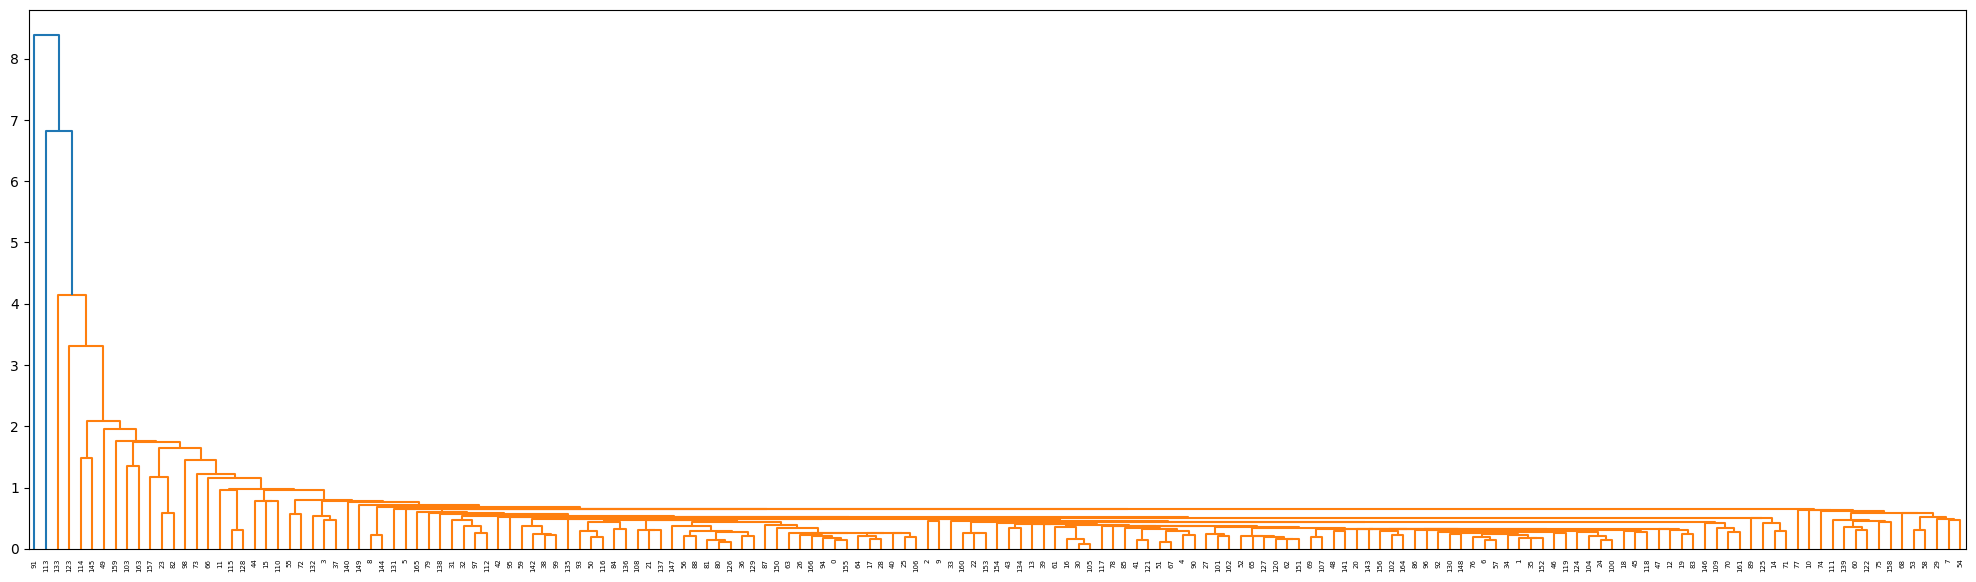

In [37]:
mergings=linkage(pca_data.iloc[:,:5],method='single',metric='euclidean')
plt.figure(figsize=(25,7))
dn=dendrogram(mergings)
plt.savefig('Single Linkage.png')

### <a id='5.5.2'>5.5.2. Complete Linkage</a>

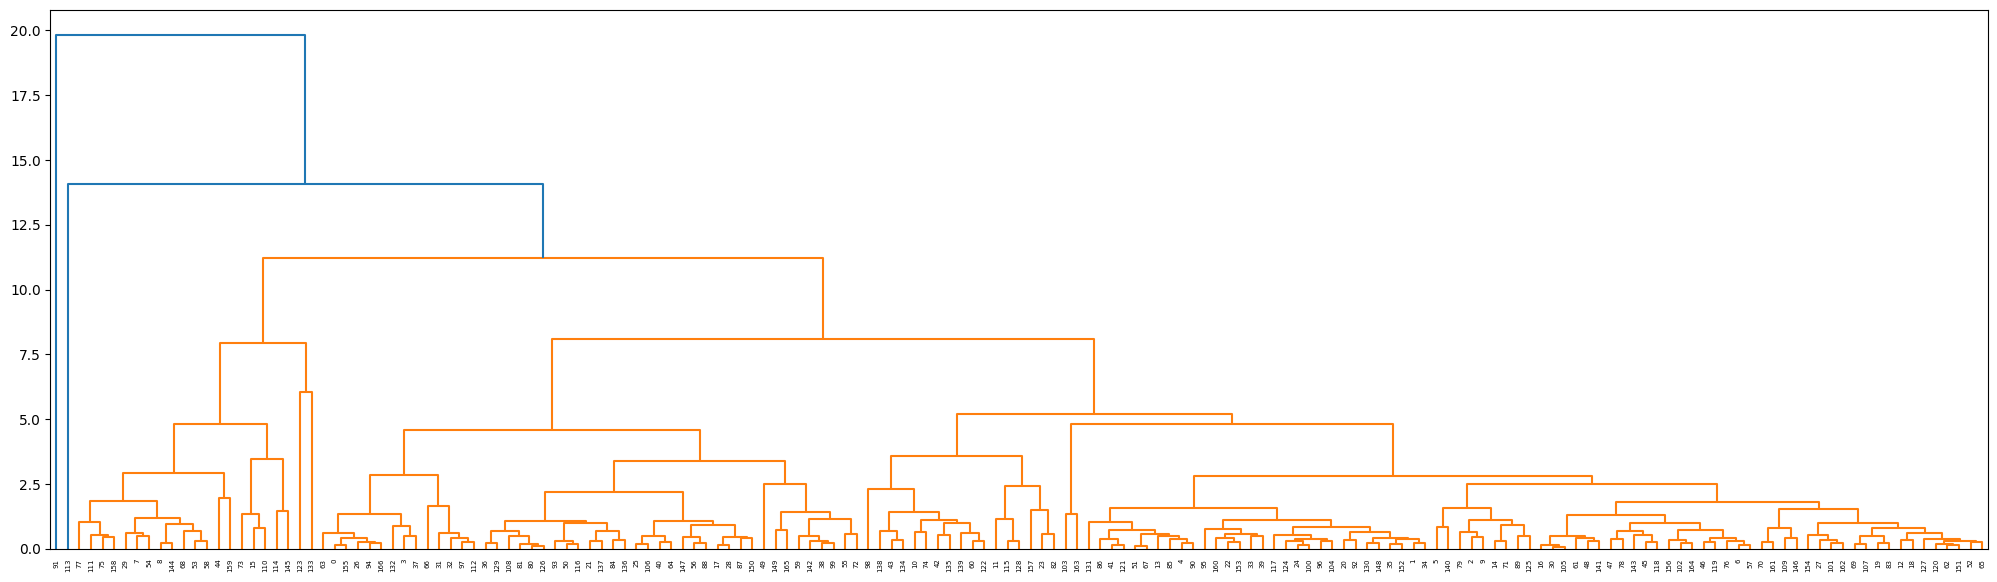

In [38]:
mergings=linkage(pca_data.iloc[:,:5],method='complete',metric='euclidean')
plt.figure(figsize=(25,7))
dn=dendrogram(mergings)
plt.savefig('Complete Linkage.png')

### As per above diagrams, let's selects no. of clusters as 3

In [39]:
h_clusters=cut_tree(mergings,n_clusters=3)
pca_data['H_ClusterID']=h_clusters.reshape(-1)
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,H_ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,0


In [40]:
#value counts of cluster ids
pca_data['H_ClusterID'].value_counts()

0    165
1      1
2      1
Name: H_ClusterID, dtype: int64

In [41]:
final_df=pd.merge(final_df,pca_data.loc[:,'H_ClusterID'], left_index=True,right_index=True)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Clustered Countries,H_ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,Under-Developed,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,Developed,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,Developed,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,Under-Developed,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,Developed,0


In [42]:
Cluster_GDPP_H=pd.DataFrame(final_df.groupby(["H_ClusterID"]).gdpp.mean())
Cluster_child_mort_H=pd.DataFrame(final_df.groupby(["H_ClusterID"]).child_mort.mean())
Cluster_income_H=pd.DataFrame(final_df.groupby(["H_ClusterID"]).income.mean())
H_mean_df = pd.concat([Cluster_GDPP_H,Cluster_child_mort_H,Cluster_income_H], axis=1)
H_mean_df

,gdpp,child_mort,income
H_ClusterID,,,
0,12470.812121,37.929091,16765.533333
1,105000.000000,2.800000,91700.000000
2,2330.000000,130.000000,5150.000000


In [43]:
K_mean_df

,gdpp,child_mort,income
ClusterID,,,
Developing,48114.285714,5.046429,50178.571429
Developed,7979.912088,20.357143,13968.021978
Under-developed,1909.208333,91.610417,3897.354167


By comparing averages of K-means and Hierarchical Clustering, we can conclude that 

Cluster 2 belongs to Under-Developed Countries,

Cluster 1 belongs to Developed Countries 

Cluster 0 belongs to Developing Countries.

In [44]:
H_needy=Country_data[Country_data['gdpp']<=2330]
H_needy=H_needy[H_needy['child_mort']>= 130]
H_needy=H_needy[H_needy['income']<= 3897.35]
H_needy=pd.merge(H_needy,pca_data.loc[:,'H_ClusterID'],left_index=True,right_index=True)
H_needy=H_needy.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])
#top 10 developed countries based on childmort
print('Countries having dire need of aid based on Hierarchical clustering are as follows:\n')
for countries in H_needy.country:
    print(countries)

Countries having dire need of aid based on Hierarchical clustering are as follows:

Sierra Leone
Central African Republic
Haiti
Mali
Chad


# <a id='7'>7. Conclusion</a>

## I Choose K-Means Clustering Algorithm over Hierarchical Clustering Algorithm because:
#### The clusterID value counts were properly divided and visualizing each cluster was possible.
#### The countries in dire need of aid by K-Means (17) were more than by Hierarchical Clustering(5)


- After comparing both K-means and Hierarchical clustering method, I am going with the K-means outcomes as the plots are clearly visible. As in both the methods, the produced mean for underdeveloped countries was almost same. i.e. deciding no. of clusters as 3 was profitable.

- After grouping all the countries into 3 groups by using some socio-economic and health factors, we can determine the overall development of the countries.

- Here, the countries are categorised into list of developed countries, developing countries and under-developed countries.

- In Developed countries, we can see the GDP per capita and income is high where as Death of children under 5 years of age per 1000 live births i.e. child-mort is very low, which is expected.

- In Developing countries and Under-developed countries, the GDP per capita and income are low and child-mort is high. Specially, for under-developed countries, the death rate of children is very high.


# <a id='8'>8. Recommendations</a>

- From bar chats, we can clearly see the socio-economic and heath situation of the under developed countries.
- In countries like Haiti, Sierra Leone, Chad, etc., the death rate of children under 5 years of age per 1000 (child-mort) is high.
- Countries like Burundi, Congo, Niger, etc., GDP per capita is very low & the income per person is also low. So, these countries are considered as Poor countries.
- If Child Mortality Rate is decreased and GDPP , Income is increased in Under-developed countries, the need will be resolved.
